# Create figures to visualize results for French, Gendered Setting, on the whole corpus.
*(messy)*

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import numpy as np
sns.set(rc={"figure.figsize":(11.7,8.2)})
sns.set(font_scale=2)


dic_df = {}

modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2","llama-3.2-3b","llama-3.2-3b-it","gemma-2-2b","gemma-2-2b-it","mistral-7b-instruct-v0.3", "mistral-7b-v0.3","croissantbase","croissant-it"]
for modele in modeles:
    df = pd.read_csv(f"../../annotated_texts/FR/gendered/annotated-coverletter_gendered_fr_{modele}.csv")
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
#data_genre = data_genre[~data_genre["Theme"].isin(['electricité, électronique','électricite, électronique', 'études et développement informatique','études géologiques'])]
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
label = "Identified_gender"

data_genre

Unnamed: 0.1  Unnamed: 0       top_p      top_k                 modele  \
0               0.0           0  top_p:0.75  top_k:100             bloom-560m   
1               1.0           1  top_p:0.75  top_k:100             bloom-560m   
2               2.0           2  top_p:0.75  top_k:100             bloom-560m   
3               3.0           3  top_p:0.75  top_k:100             bloom-560m   
4               4.0           4  top_p:0.75  top_k:100             bloom-560m   
...             ...         ...         ...        ...                    ...   
69547        4963.0        4963        0.95         10  CroissantLLMChat-v0.1   
69548        4964.0        4964        0.95         10  CroissantLLMChat-v0.1   
69549        4965.0        4965        0.95         10  CroissantLLMChat-v0.1   
69550        4966.0        4966        0.95         10  CroissantLLMChat-v0.1   
69551        4967.0        4967        0.95         10  CroissantLLMChat-v0.1   

                 theme                                             prompt  \
0      psychopédagogie  Je suis diplômé de psychopédagogie et je suis ...   
1      psychopédagogie  Je suis diplômé de psychopédagogie et je suis ...   
2      psychopédagogie  Je suis diplômé de psychopédagogie et je suis ...   
3      psychopédagogie  Je suis diplômée de psychopédagogie et je suis...   
4      psychopédagogie  Je suis diplômée de psychopédagogie et je suis...   
...                ...                                                ...   
69547         stylisme  suis diplômé(e) de stylisme et je suis à la re...   
69548         stylisme  suis diplômé(e) de stylisme et je suis à la re...   
69549         stylisme  suis diplômé·e de stylisme et je suis à la rec...   
69550         stylisme  suis diplômé·e de stylisme et je suis à la rec...   
69551         stylisme  suis diplômé·e de stylisme et je suis à la rec...   

                 genre                                             output  \
0      ['Prompt_masc']  Je suis diplômé de psychopédagogie et je suis ...   
1      ['Prompt_masc']  Je suis diplômé de psychopédagogie et je suis ...   
2      ['Prompt_masc']  Je suis diplômé de psychopédagogie et je suis ...   
3       ['Prompt_fém']  Je suis diplômée de psychopédagogie et je suis...   
4       ['Prompt_fém']  Je suis diplômée de psychopédagogie et je suis...   
...                ...                                                ...   
69547              NaN  Je suis diplômé(e) de stylisme et je suis à la...   
69548              NaN  Je suis diplômé(e) de stylisme et je suis à la...   
69549              NaN  Je suis diplômé·e de stylisme et je suis à la ...   
69550              NaN  Je suis diplômé·e de stylisme et je suis à la ...   
69551              NaN  Je suis diplômé·e de stylisme et je suis à la ...   

      Identified_gender        Detailed_counter  \
0               Neutral               Counter()   
1             Masculine    Counter({'Masc': 4})   
2             Masculine    Counter({'Masc': 4})   
3               Neutral               Counter()   
4               Neutral               Counter()   
...                 ...                     ...   
69547          Feminine     Counter({'Fem': 3})   
69548          Feminine     Counter({'Fem': 1})   
69549         Masculine    Counter({'Masc': 1})   
69550           Neutral  Counter({'Neutre': 1})   
69551          Feminine     Counter({'Fem': 1})   

                           Detailed_markers             genre_prompt  \
0                                        []                      NaN   
1      [diplômé, diplômé, diplômé, diplômé]                      NaN   
2            [doué, prêt, amené, intervenu]                      NaN   
3                                        []                      NaN   
4                                        []                      NaN   
...                                     ...                      ...   
69547    [motivée, passionnée, polyvalente]  Prompt_inclusif_parent

## Proportions of generated gender overall

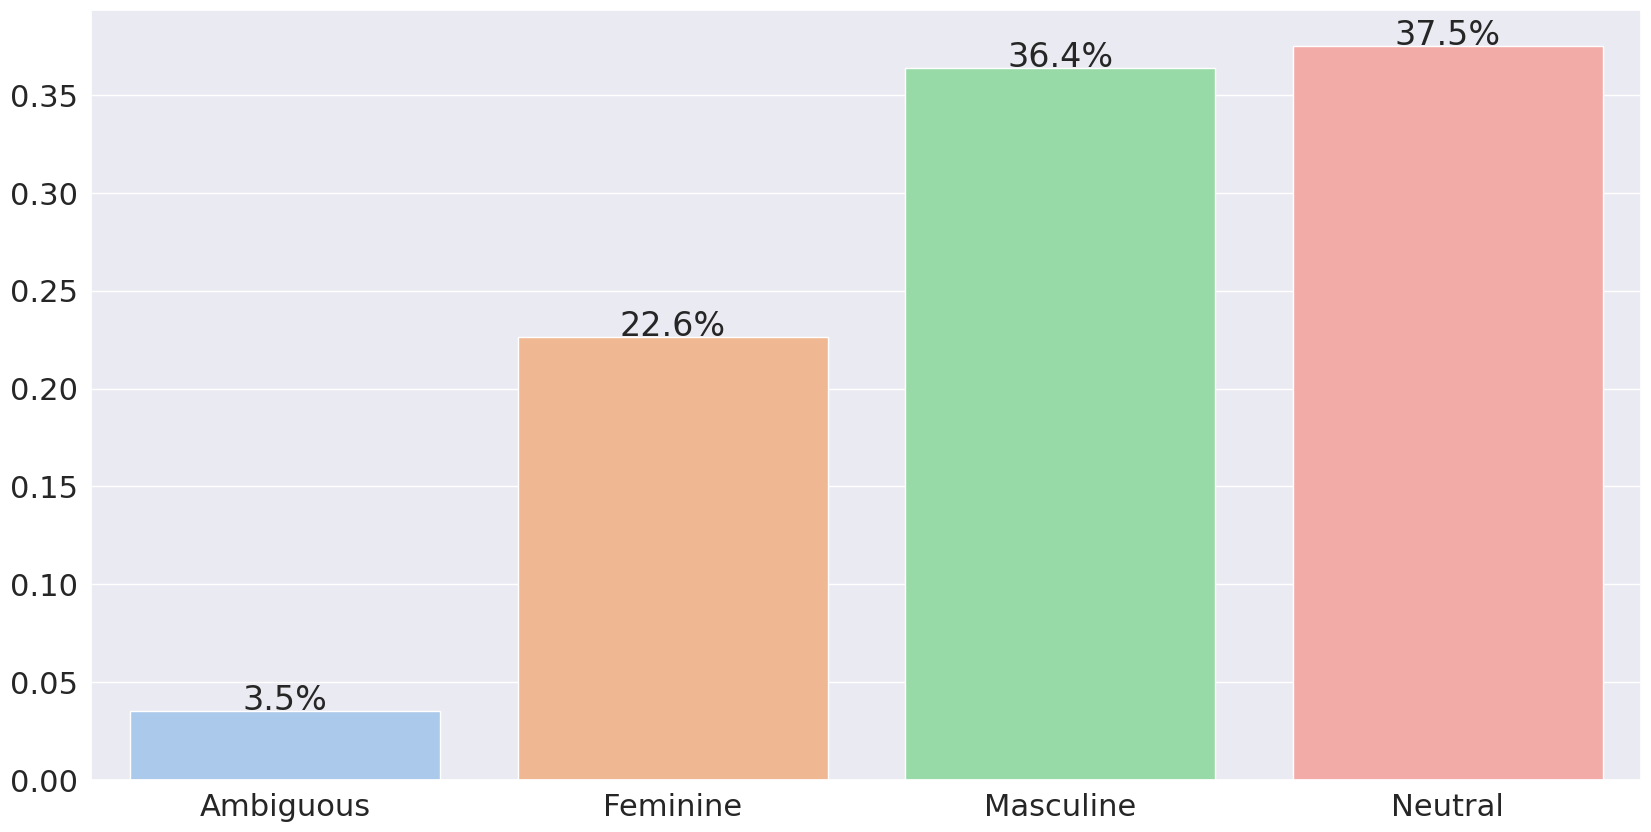

"Remarque : neutre + prévalent car 2 catégories d'écriture inclusive mais masculin quand même majoritaire alors qu'autant de prompts masc que fém"

In [61]:
def exploration_donnees(dataset, label, savefig=False, savecsv=False):
    x = dataset[label].value_counts(normalize=True)

    #titre = "Nombre d'instances par étiquette"
    colors = sns.color_palette("pastel", len(x))
    sns.set(rc={"figure.figsize":(20, 10)})
    sns.set(font_scale=2)
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax = sns.barplot(x=x.index, y=x)
    #ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/gender_distributions_gendered_fr.png", bbox_inches="tight")

    if savecsv:
        x.to_csv(f"./value_counts_{label}.csv", header=["Pourcentage"])

    plt.show()  # Display the plot
    return x.to_dict()

exploration_donnees(data_genre,label,True)

"""Remarque : neutre + prévalent car 2 catégories d'écriture inclusive mais masculin quand même majoritaire alors qu'autant de prompts masc que fém"""

## Proportions of generated gender per LM

Neutral    Masculine    Feminine    Ambiguous    model
---------  -----------  ----------  -----------  ------------------------
34.9%      30.7%        29.7%       4.7%         bloom-560m
28.2%      42.2%        25.0%       4.6%         bloom-3b
34.2%      40.7%        20.9%       4.2%         bloom-7b
35.3%      39.2%        21.0%       4.4%         vigogne-2-7b
39.7%      39.7%        17.9%       2.8%         gpt2-fr
67.2%      19.6%        12.4%       0.9%         xglm-2
15.5%      53.2%        27.6%       3.7%         llama-3.2-3b
16.6%      52.8%        27.4%       3.1%         llama-3.2-3b-it
43.3%      31.6%        21.2%       3.9%         gemma-2-2b
53.4%      36.5%        7.7%        2.5%         gemma-2-2b-it
32.5%      31.4%        31.8%       4.3%         mistral-7b-instruct-v0.3
54.8%      17.5%        25.7%       2.0%         mistral-7b-v0.3
42.3%      32.0%        23.0%       2.7%         croissantbase
33.7%      36.5%        25.0%       4.8%         croissant-it


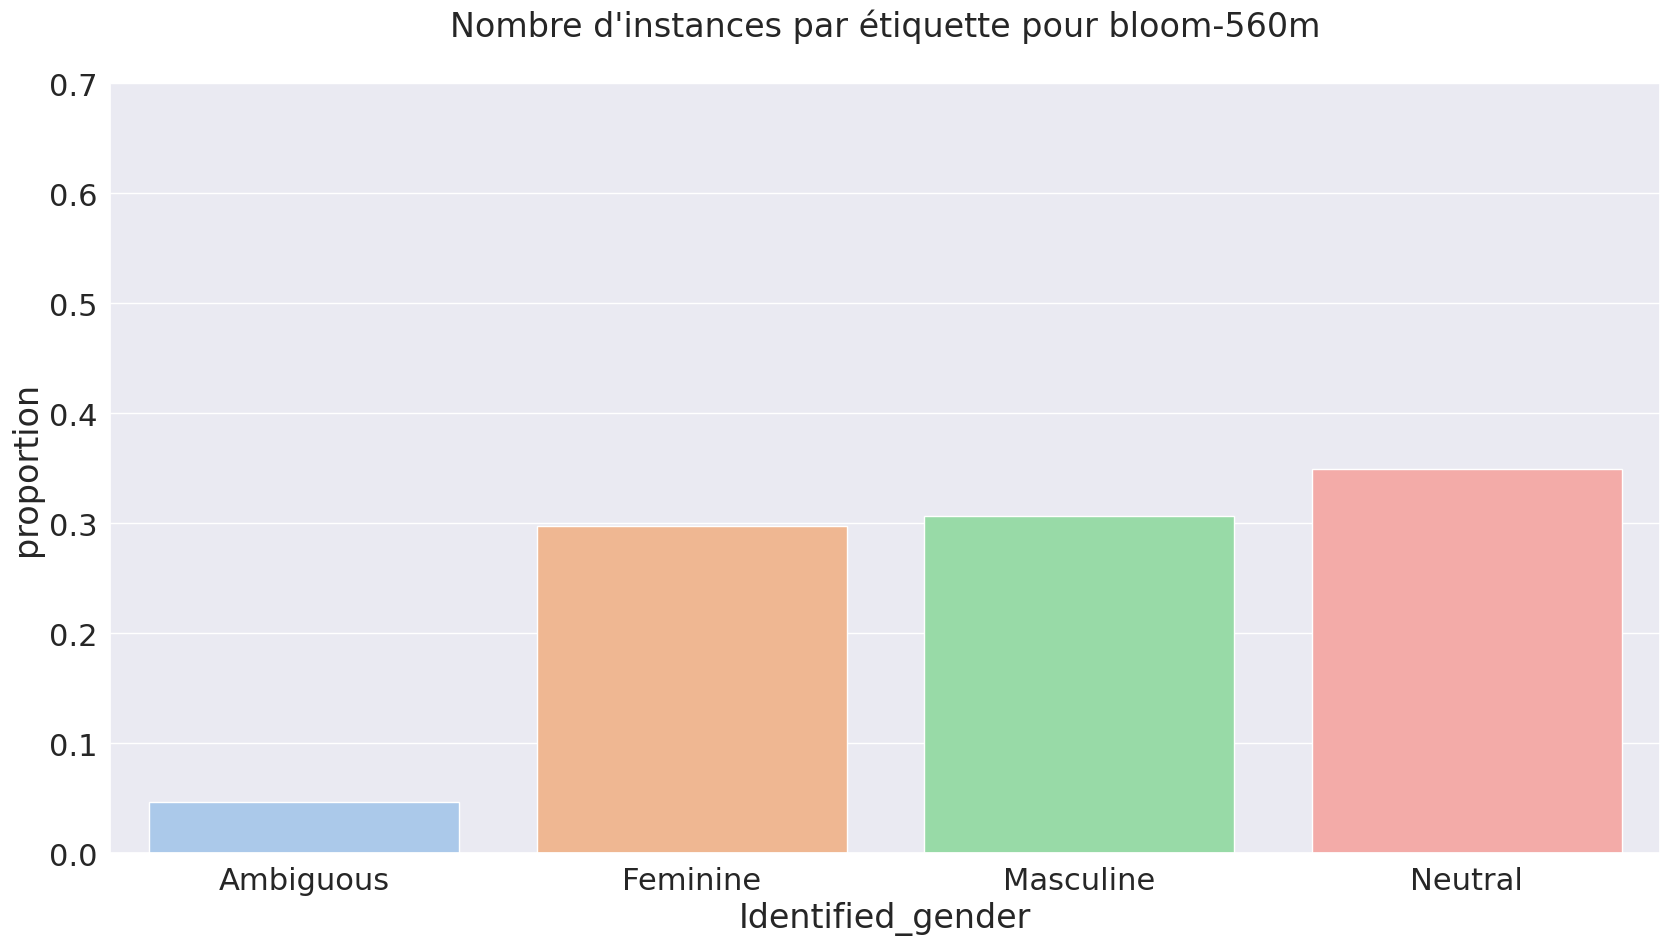

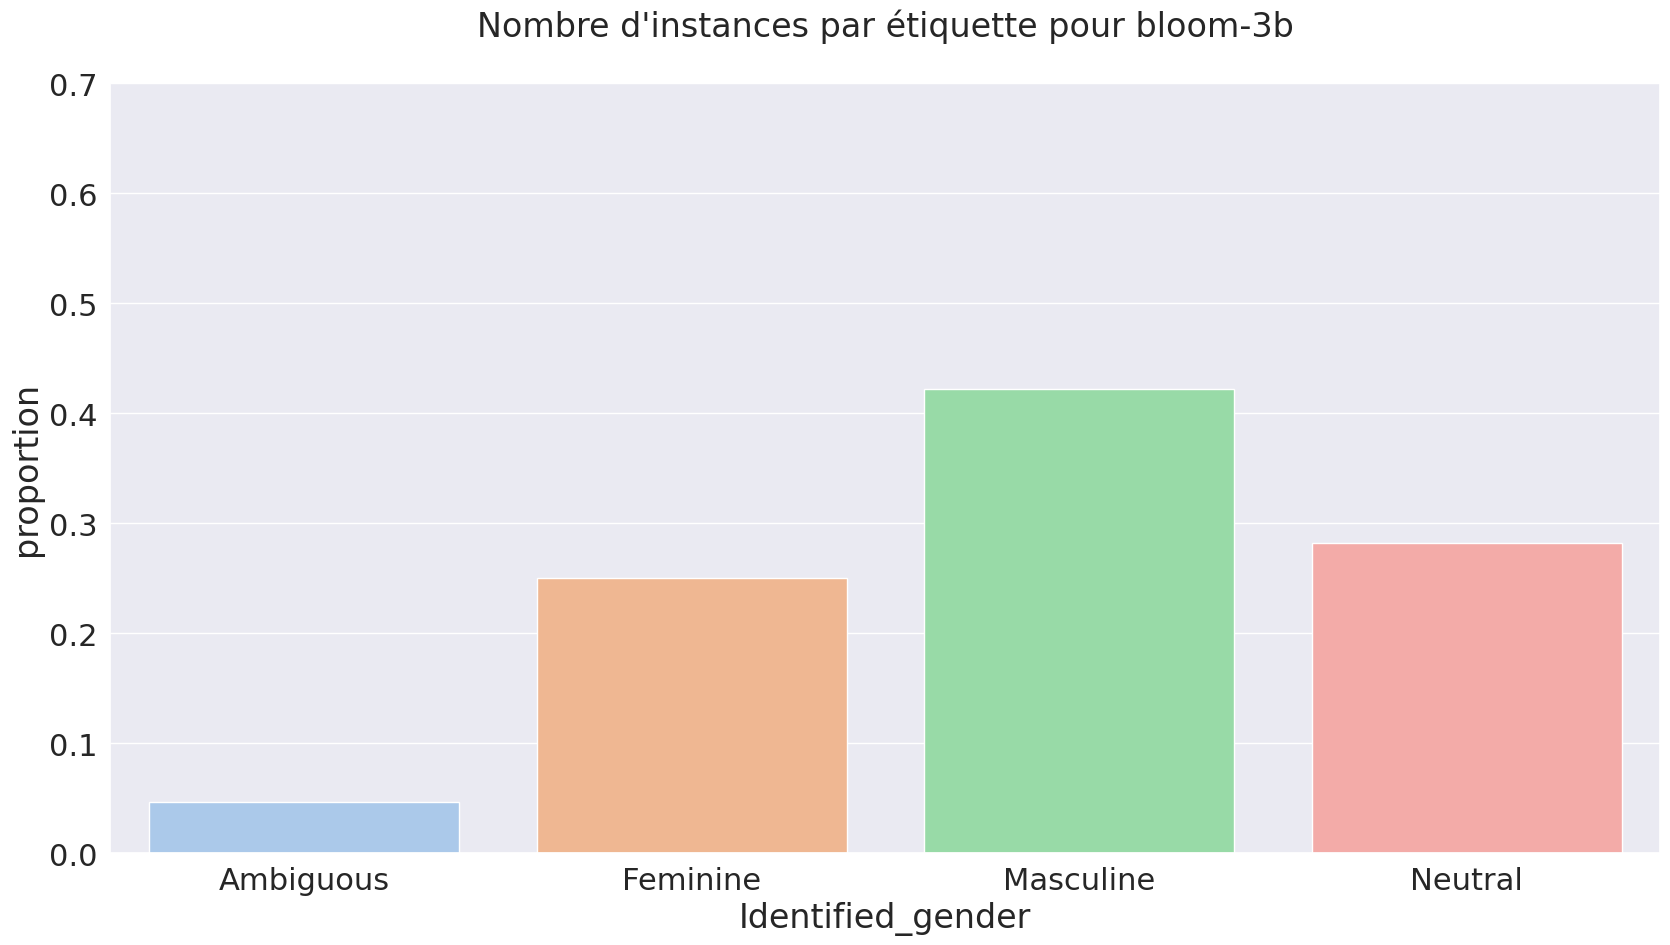

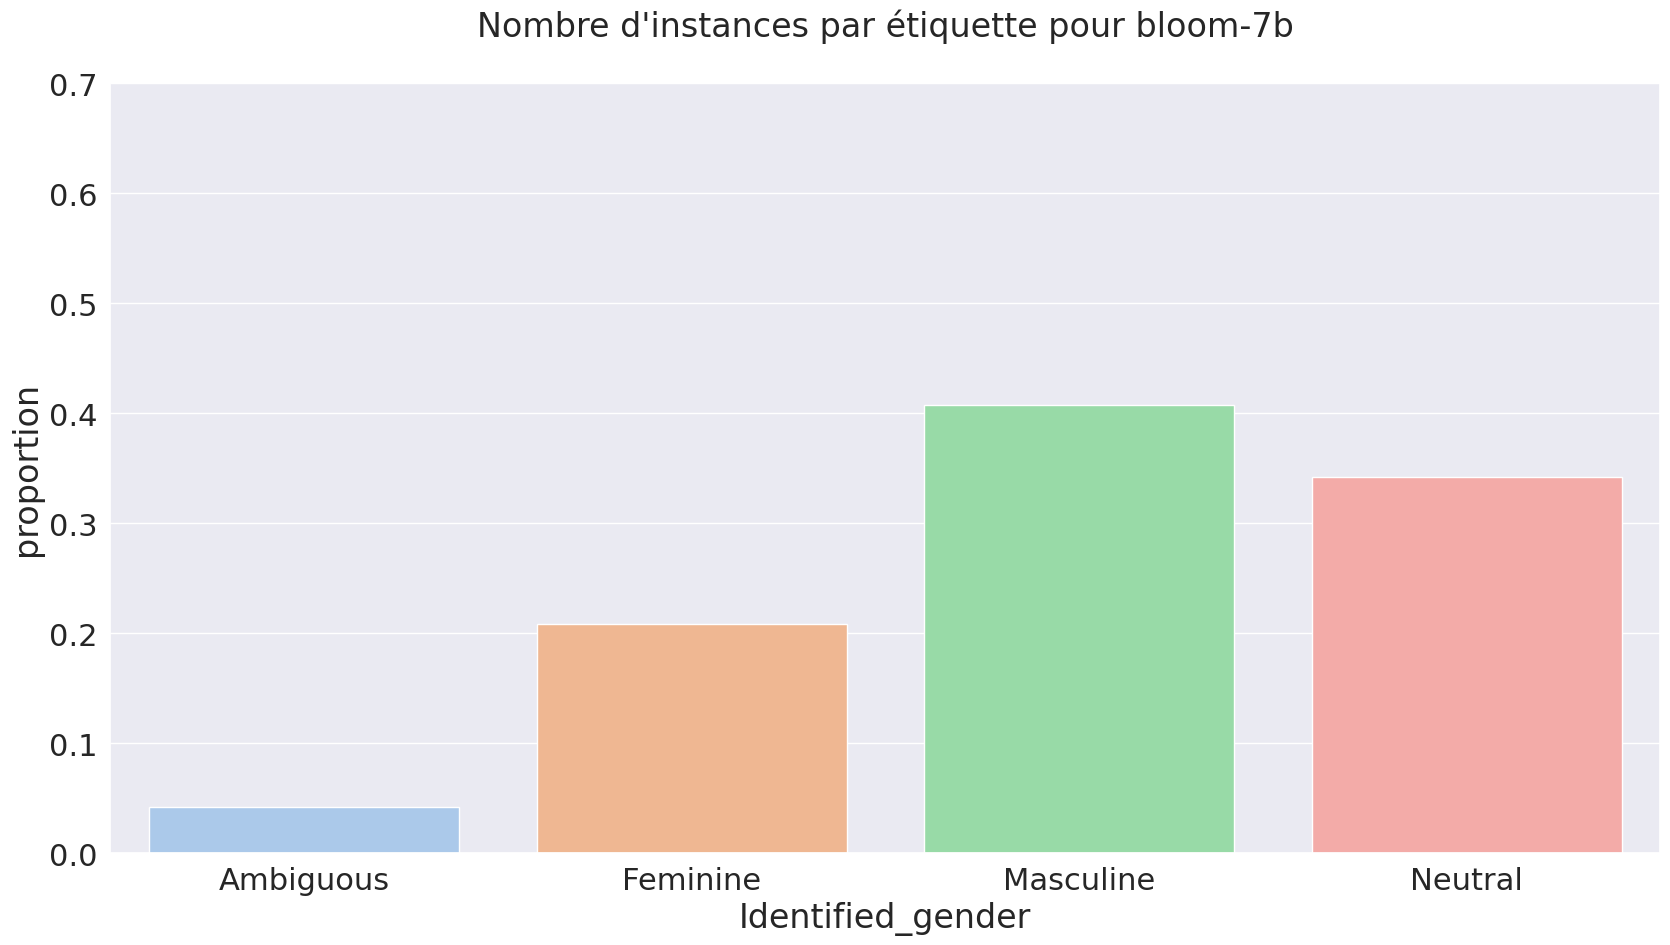

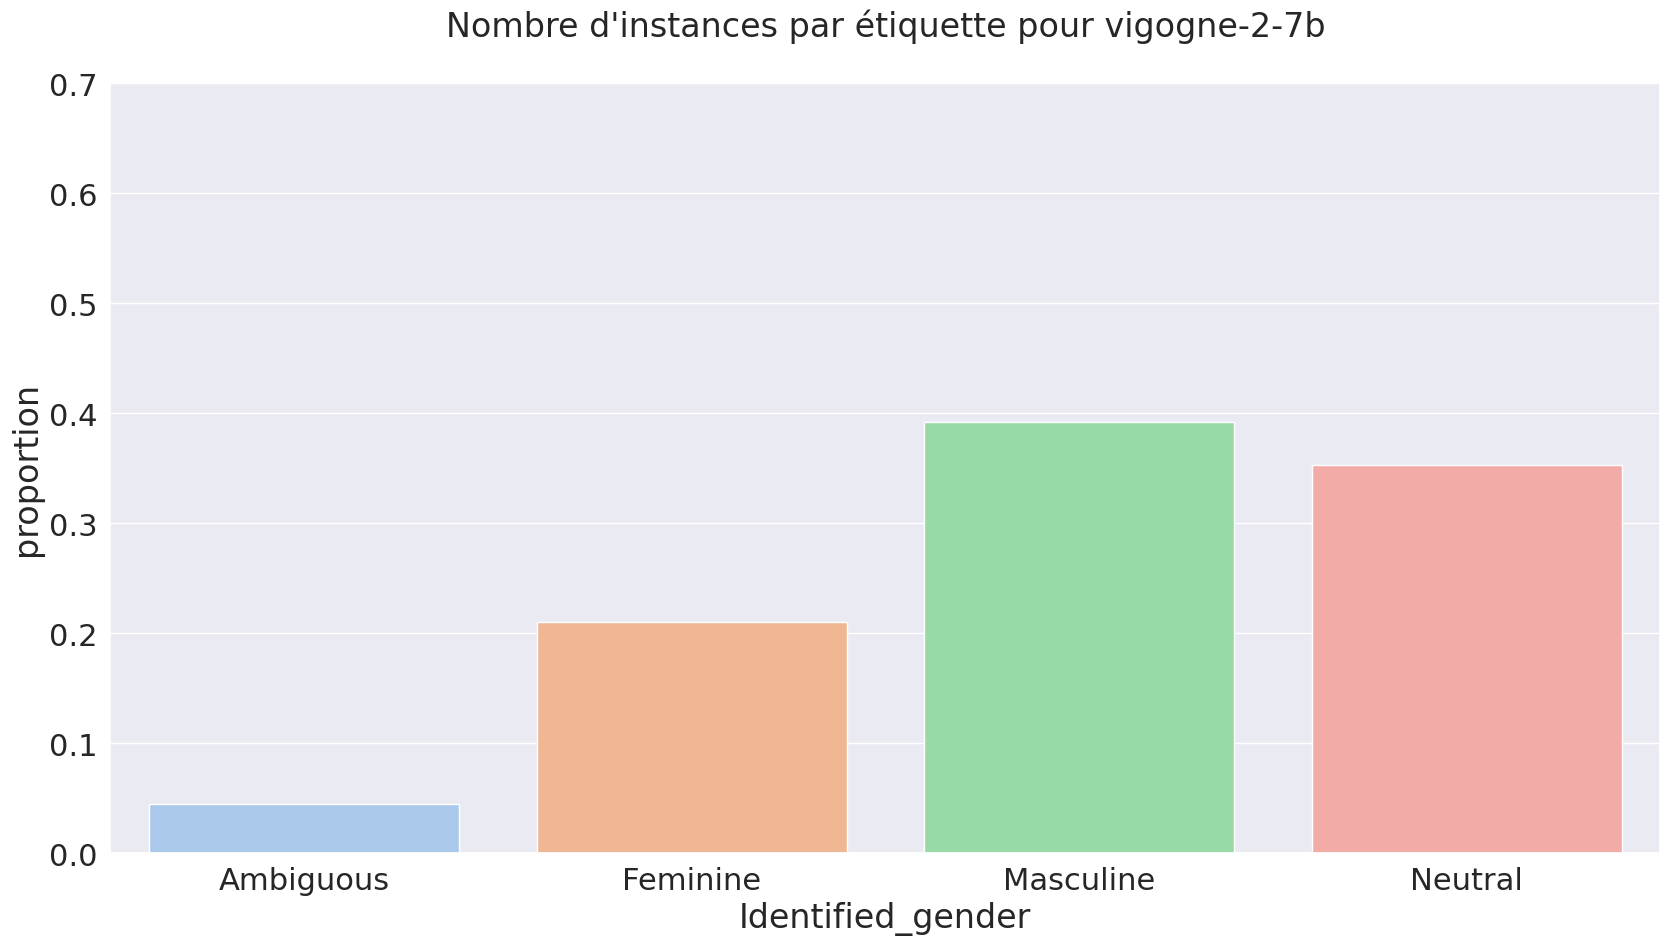

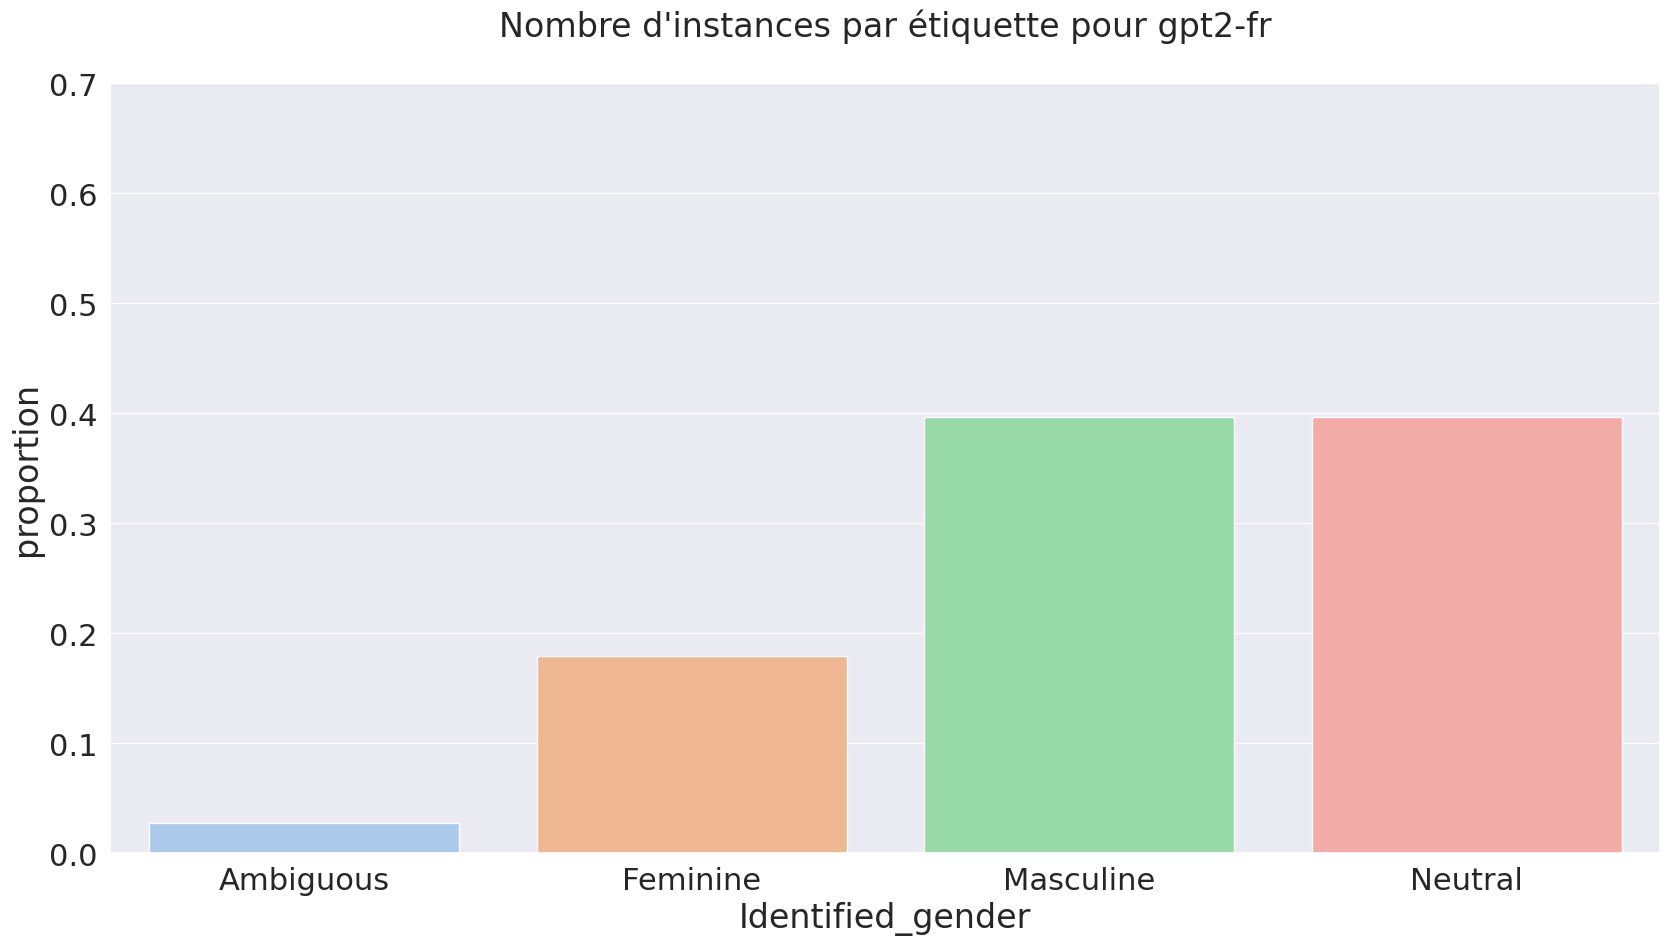

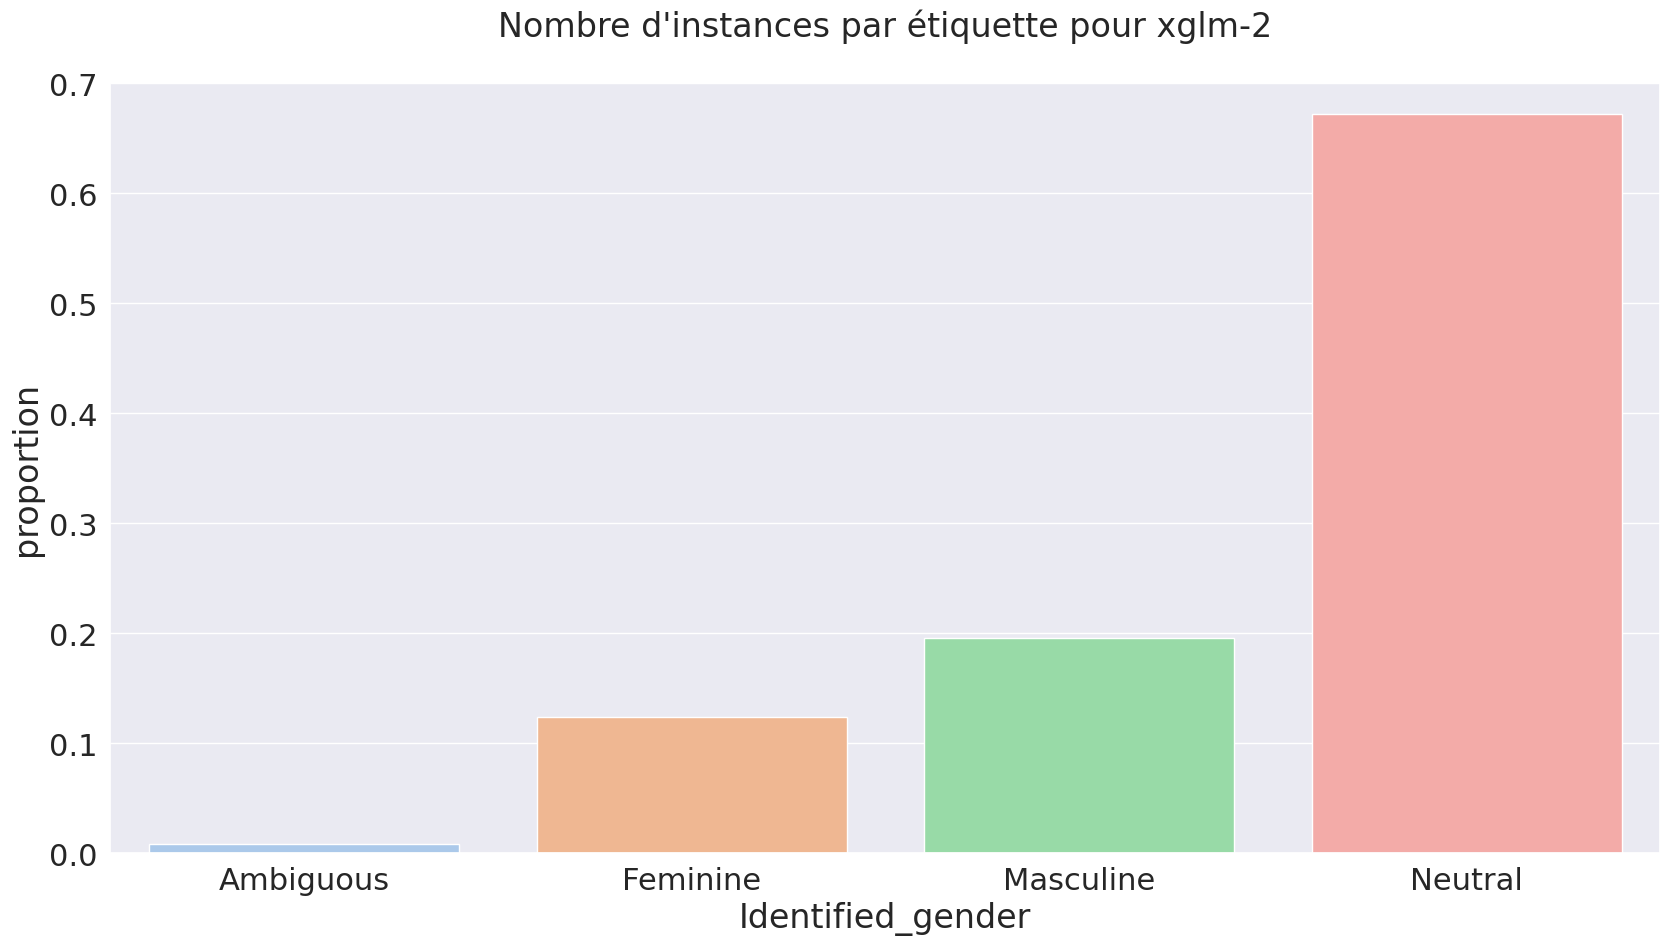

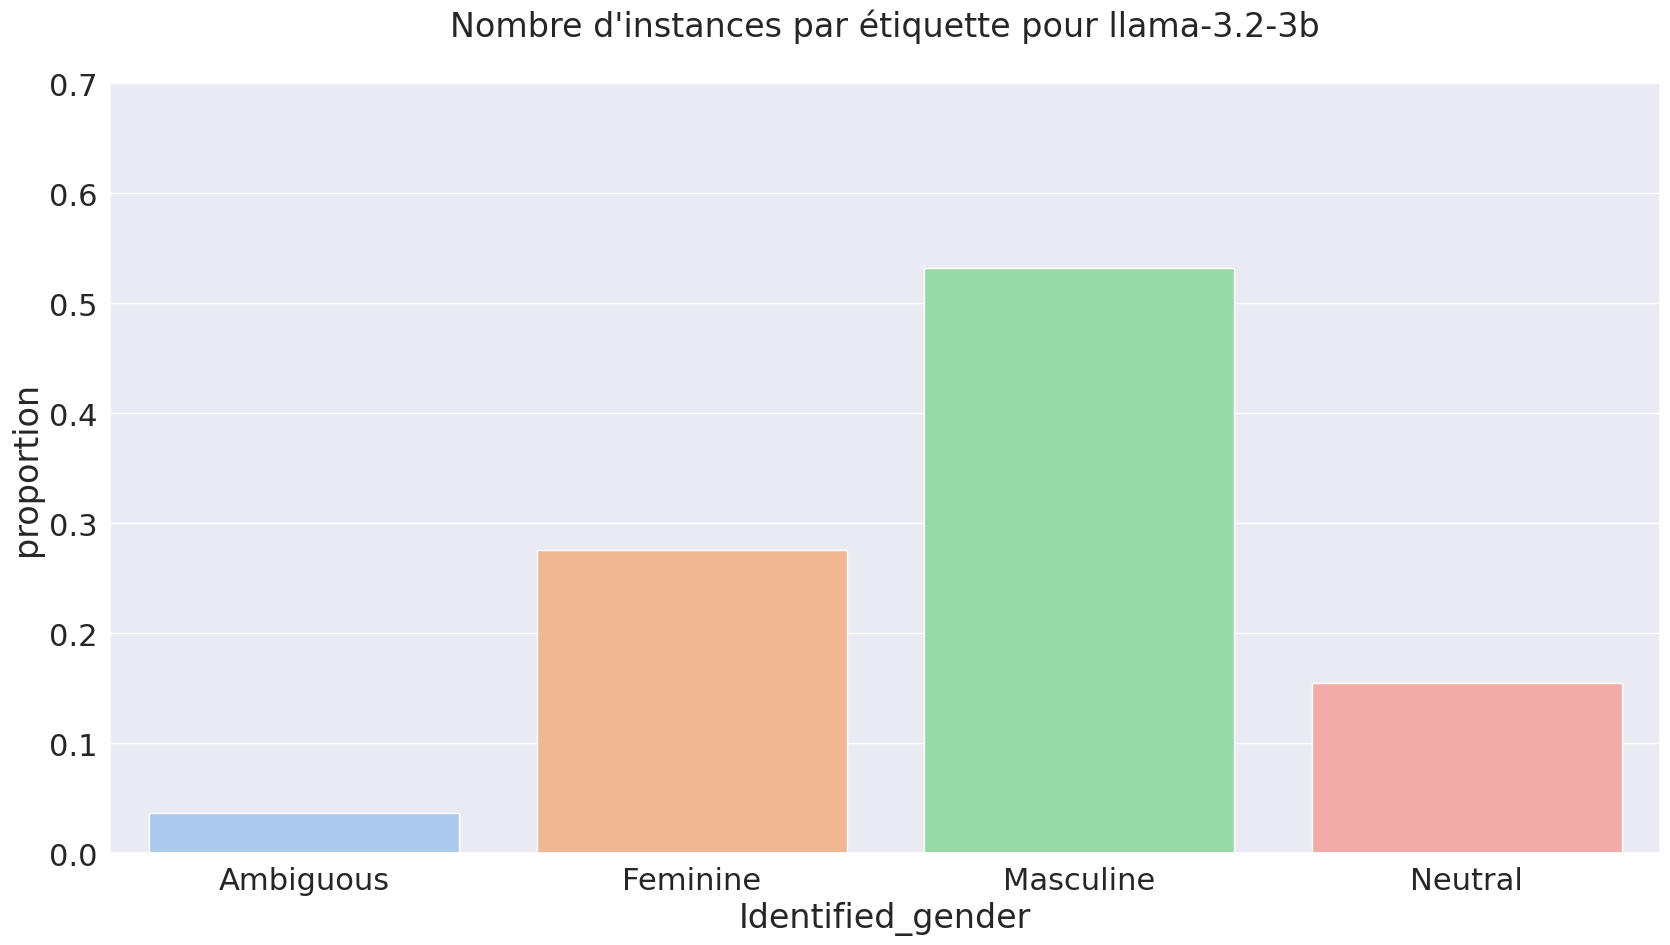

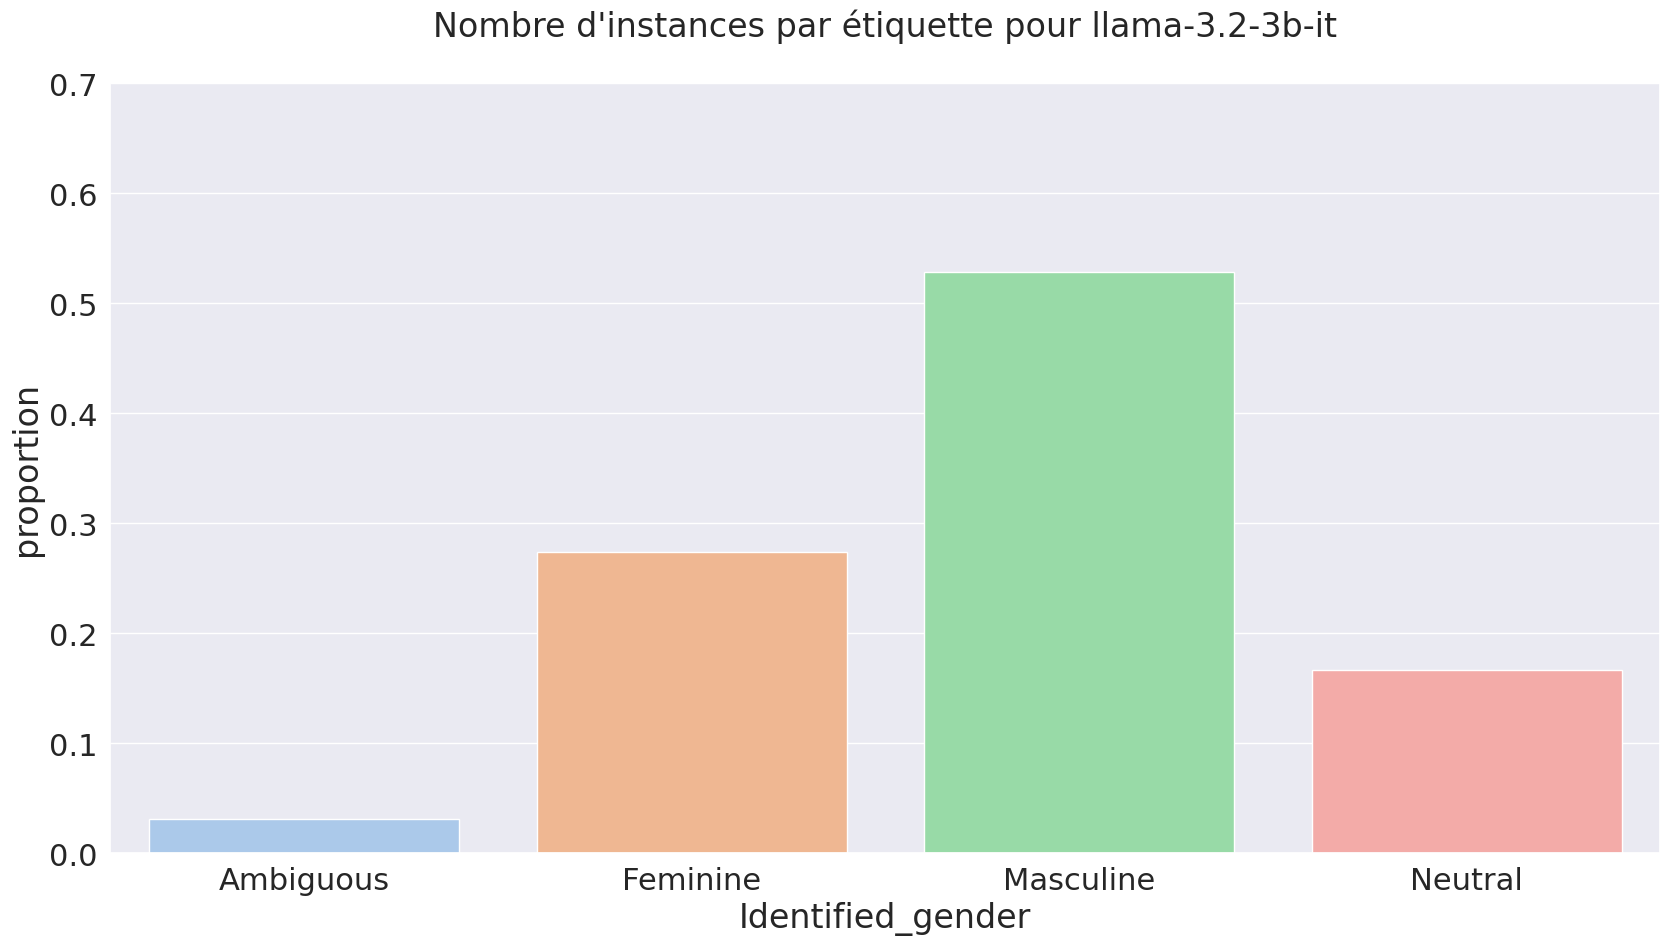

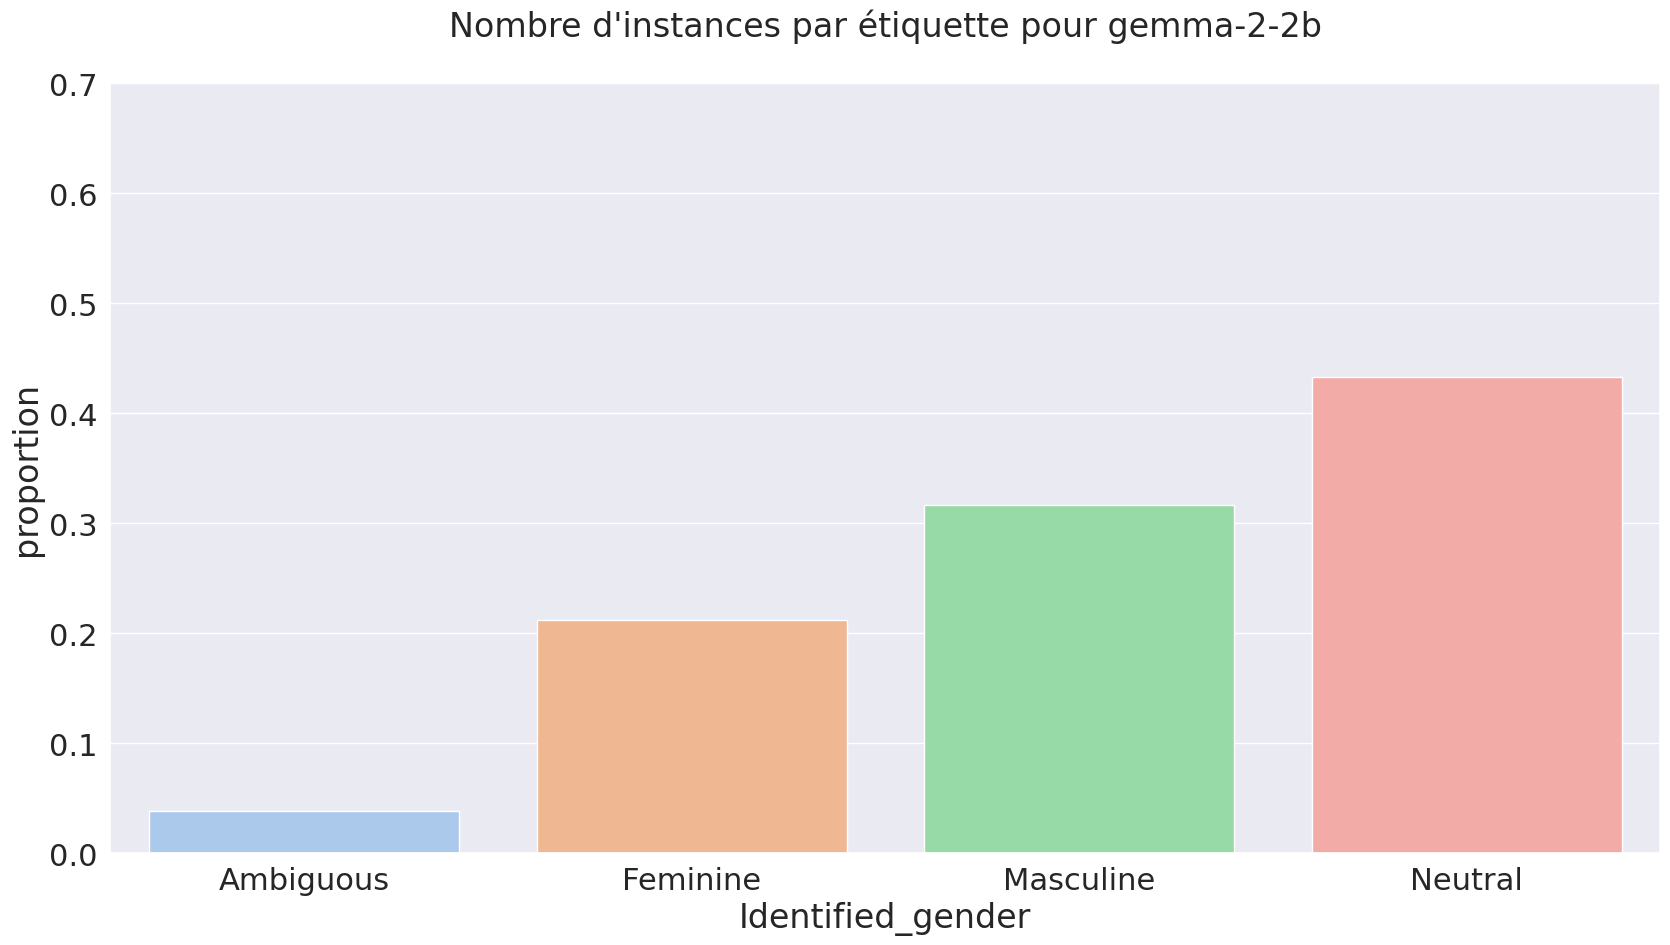

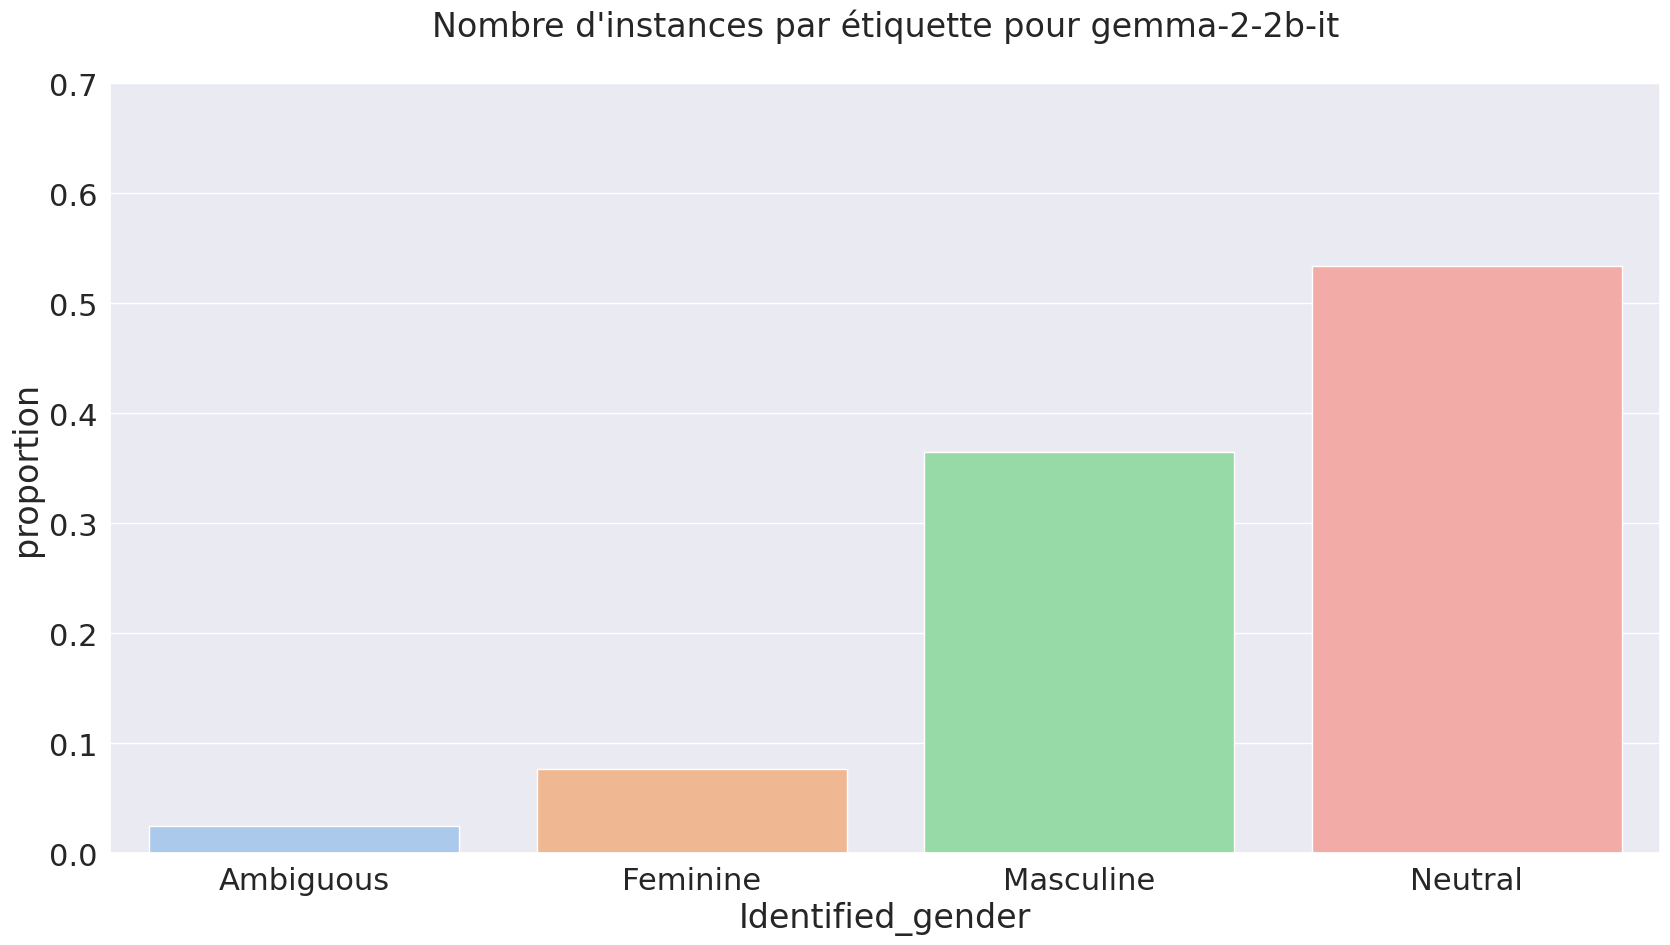

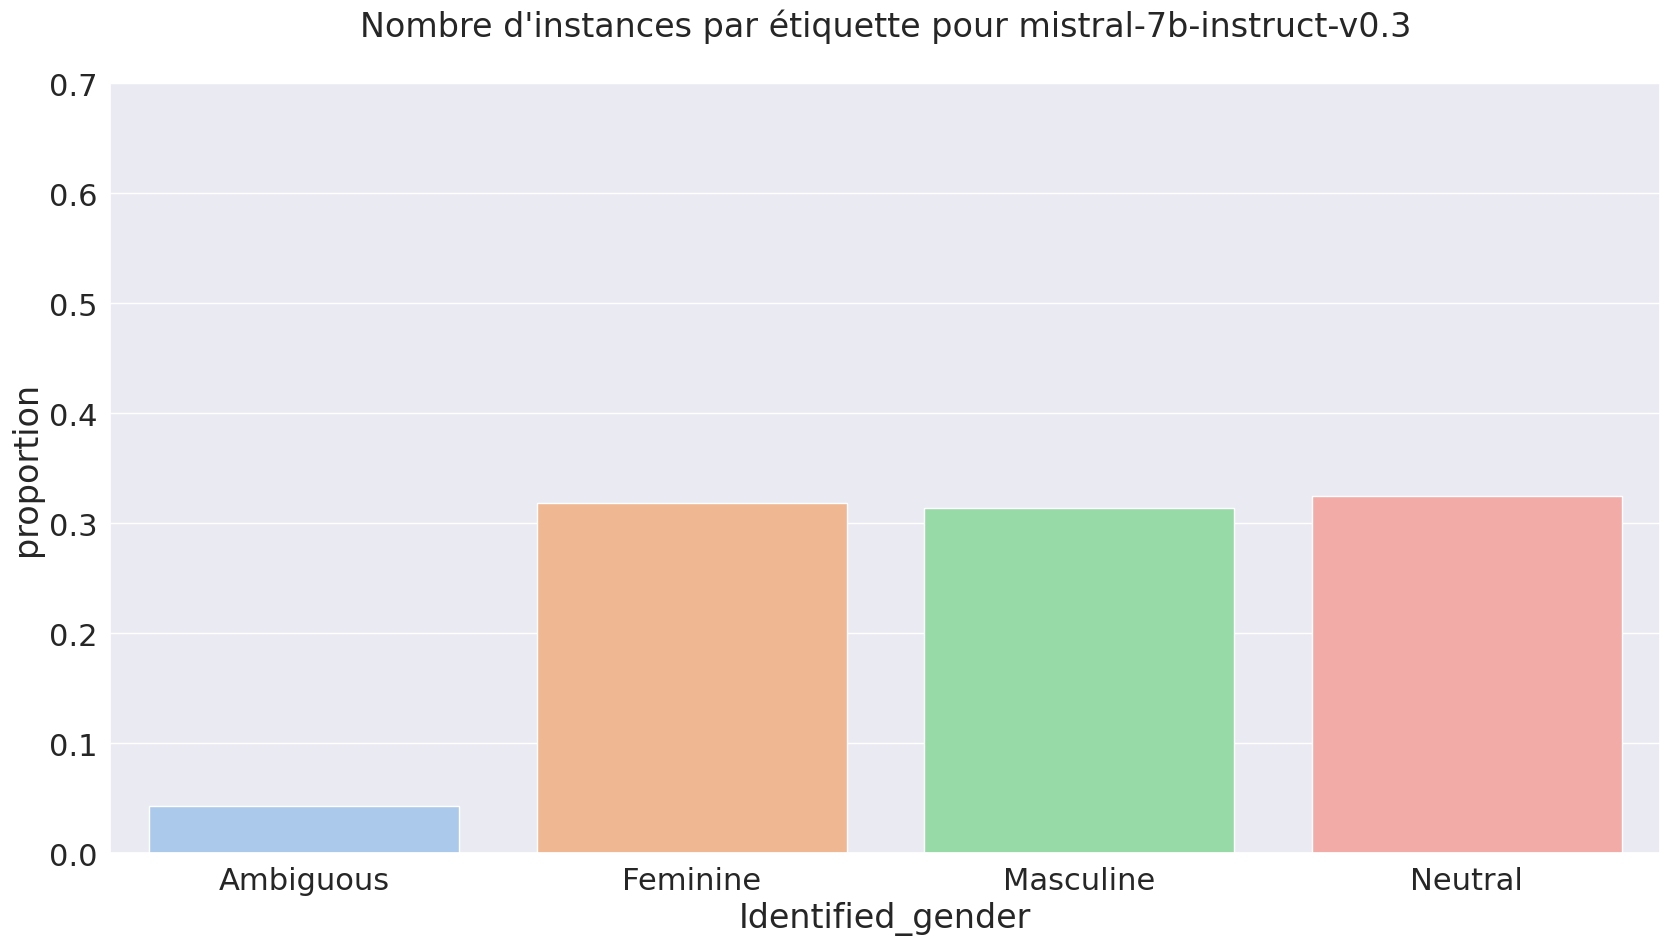

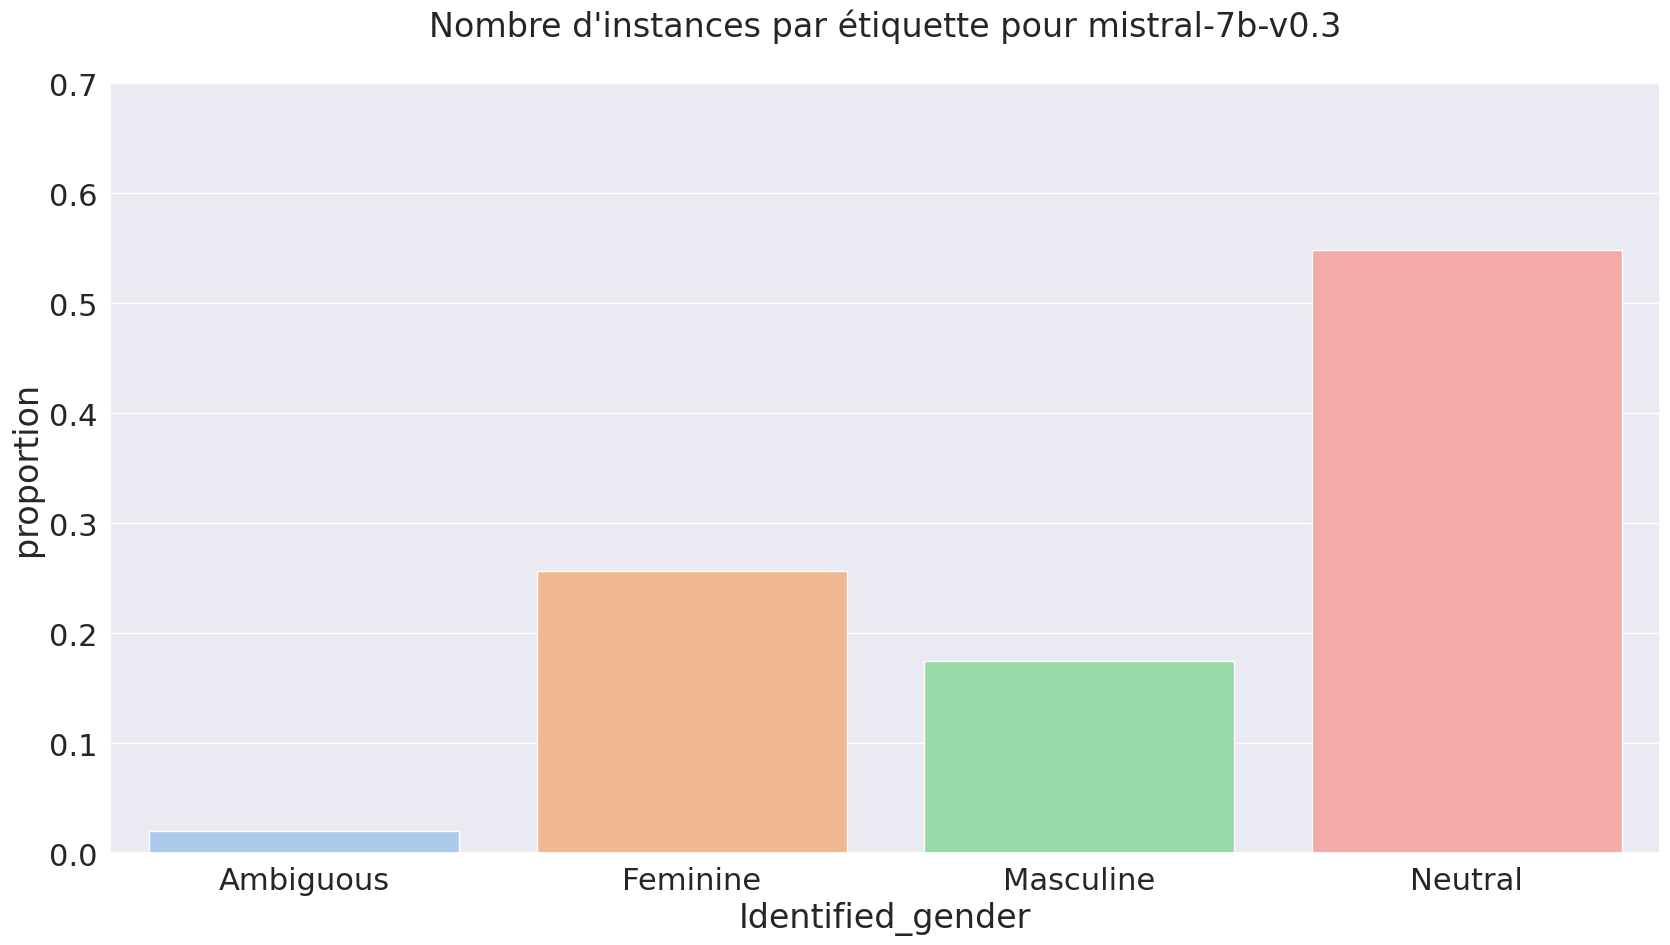

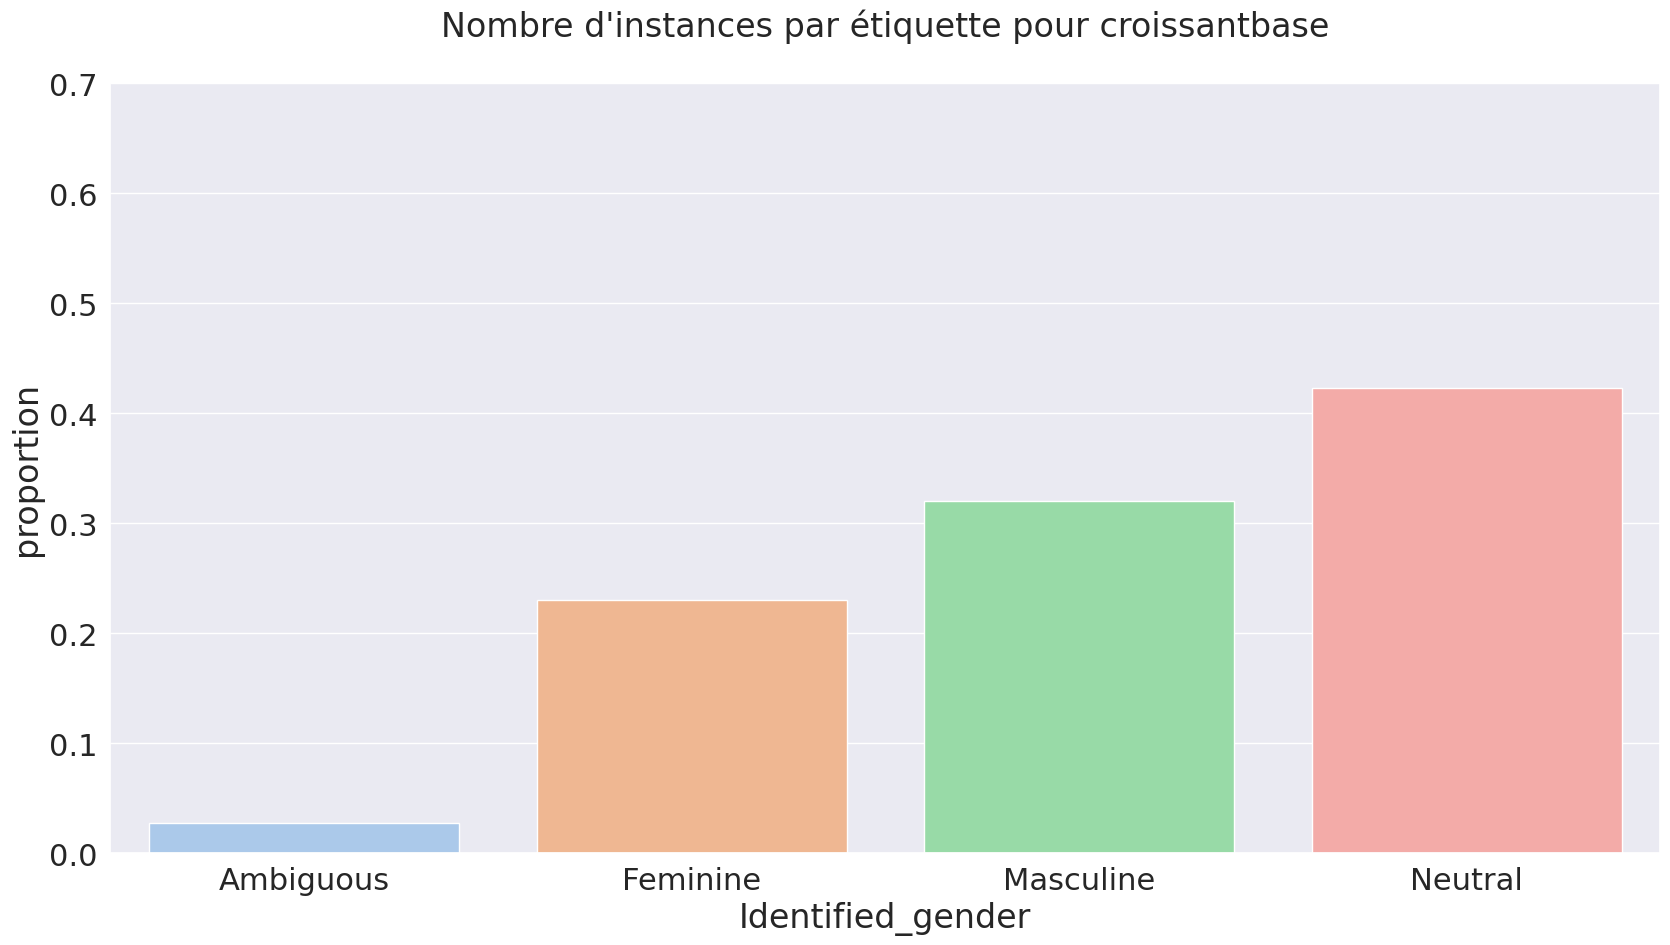

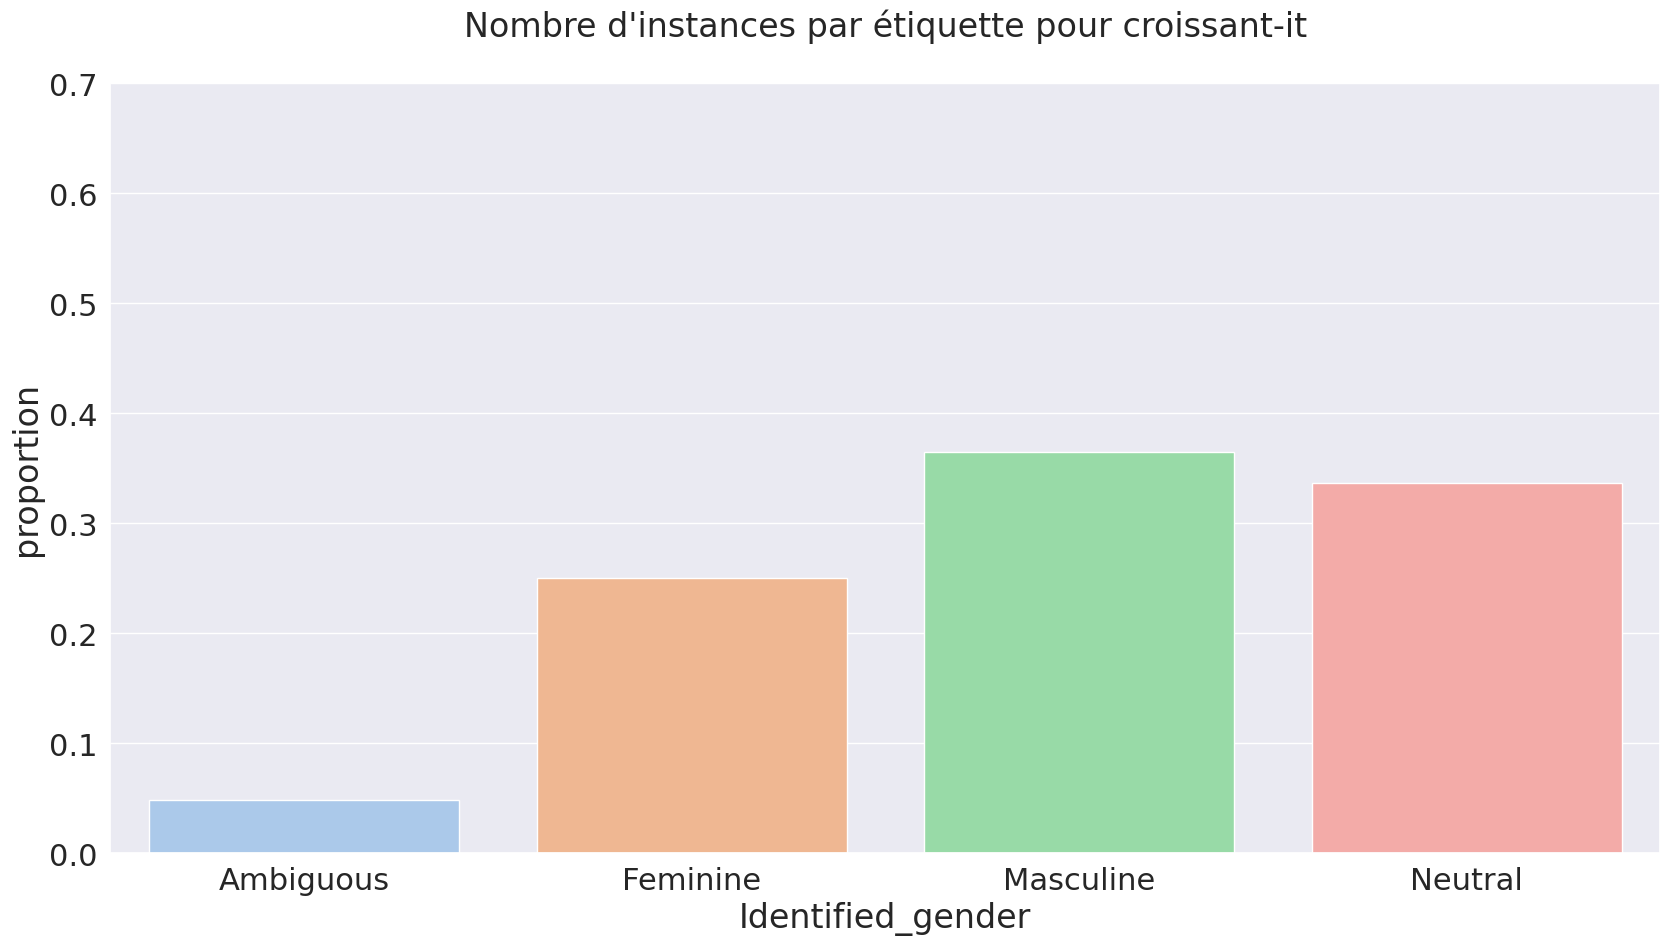

In [62]:
"""Nombre de générations par genre selon le modèle"""

def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    colors = sns.color_palette("pastel", len(x))

    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    plt.ylim(0, 0.7)
    sns.barplot(x=x_fig.index,y=x_fig, order=sorted(x.index), palette=colors).set(title=titre)
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/gender_distributions_gendered_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

[{'Neutral': '34.9%', 'Masculine': '30.7%', 'Feminine': '29.7%', 'Ambiguous': '4.7%', 'model': 'bloom-560m'}, {'Masculine': '42.2%', 'Neutral': '28.2%', 'Feminine': '25.0%', 'Ambiguous': '4.6%', 'model': 'bloom-3b'}, {'Masculine': '40.7%', 'Neutral': '34.2%', 'Feminine': '20.9%', 'Ambiguous': '4.2%', 'model': 'bloom-7b'}, {'Masculine': '39.2%', 'Neutral': '35.3%', 'Feminine': '21.0%', 'Ambiguous': '4.4%', 'model': 'vigogne-2-7b'}, {'Masculine': '39.7%', 'Neutral': '39.7%', 'Feminine': '17.9%', 'Ambiguous': '2.8%', 'model': 'gpt2-fr'}, {'Neutral': '67.2%', 'Masculine': '19.6%', 'Feminine': '12.4%', 'Ambiguous': '0.9%', 'model': 'xglm-2'}, {'Masculine': '53.2%', 'Feminine': '27.6%', 'Neutral': '15.5%', 'Ambiguous': '3.7%', 'model': 'llama-3.2-3b'}, {'Masculine': '52.8%', 'Feminine': '27.4%', 'Neutral': '16.6%', 'Ambiguous': '3.1%', 'model': 'llama-3.2-3b-it'}, {'Neutral': '43.3%', 'Masculine': '31.6%', 'Feminine': '21.2%', 'Ambiguous': '3.9%', 'model': 'gemma-2-2b'}, {'Neutral': '53.4%',

[]

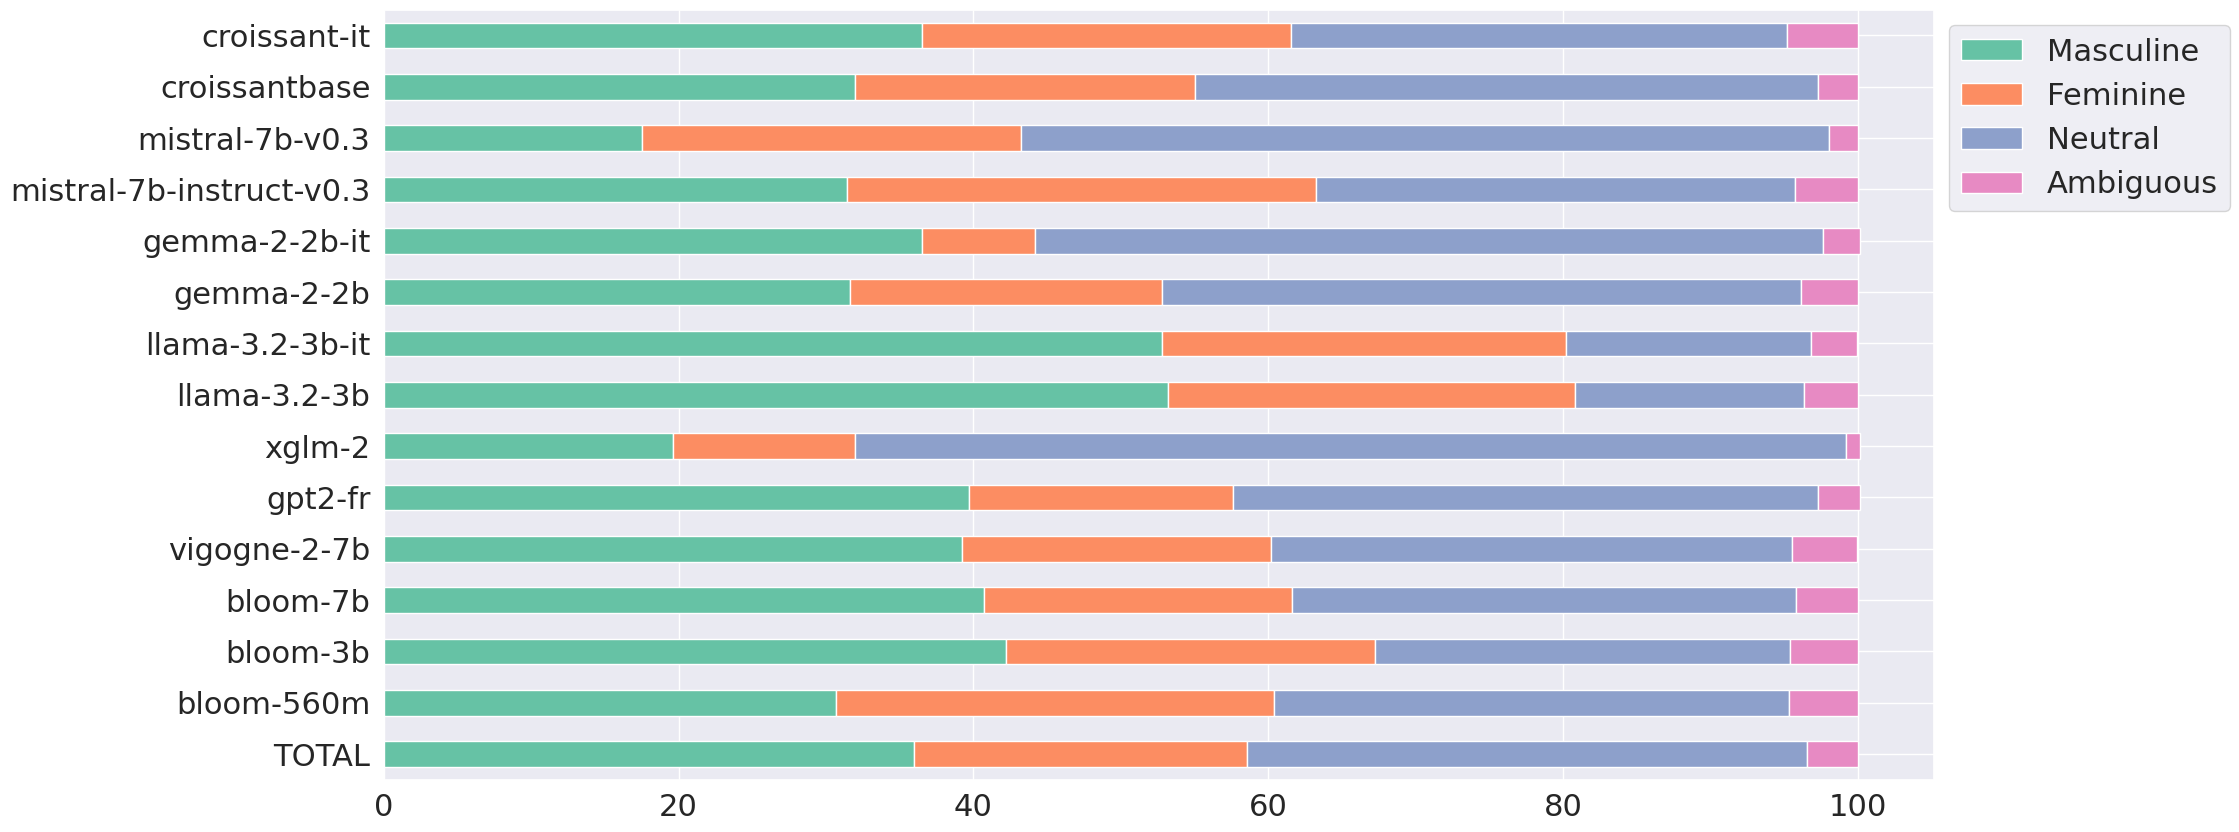

In [63]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True,color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_model.png",bbox_inches = "tight")
ax.plot()

## Proportions of generated gender per professional field

In [64]:
def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["theme"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/gender_distributions_gendered_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
topics = list(set(data_genre["theme"]))

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Neutral    Masculine    Feminine    Ambiguous    topic
---------  -----------  ----------  -----------  ------------------------------------------------------------------------------------------------------
40.3%      39.6%        18.5%       1.6%         assistance informatique, maintenance de logiciels et réseaux
28.8%      36.9%        28.8%       5.5%         linguistique et didactique des langues
36.6%      35.0%        26.4%       1.9%         arts plastiques
38.0%      37.3%        20.1%       4.5%         recherche agronomique
45.4%      30.8%        21.2%       2.6%         gestion et mise à disposition de ressources documentaires, conservation des archives
36.3%      35.7%        24.1%       3.9%         fabrication textile
27.5%      36.6%        29.1%       6.9%         musique et chant
35.4%      43.7%        17.5%       3.3%         films d'animation et effets spéciaux
38.0%      37.1%        19.8%       5.1%         management d'établissement de restauration collective
4

[]

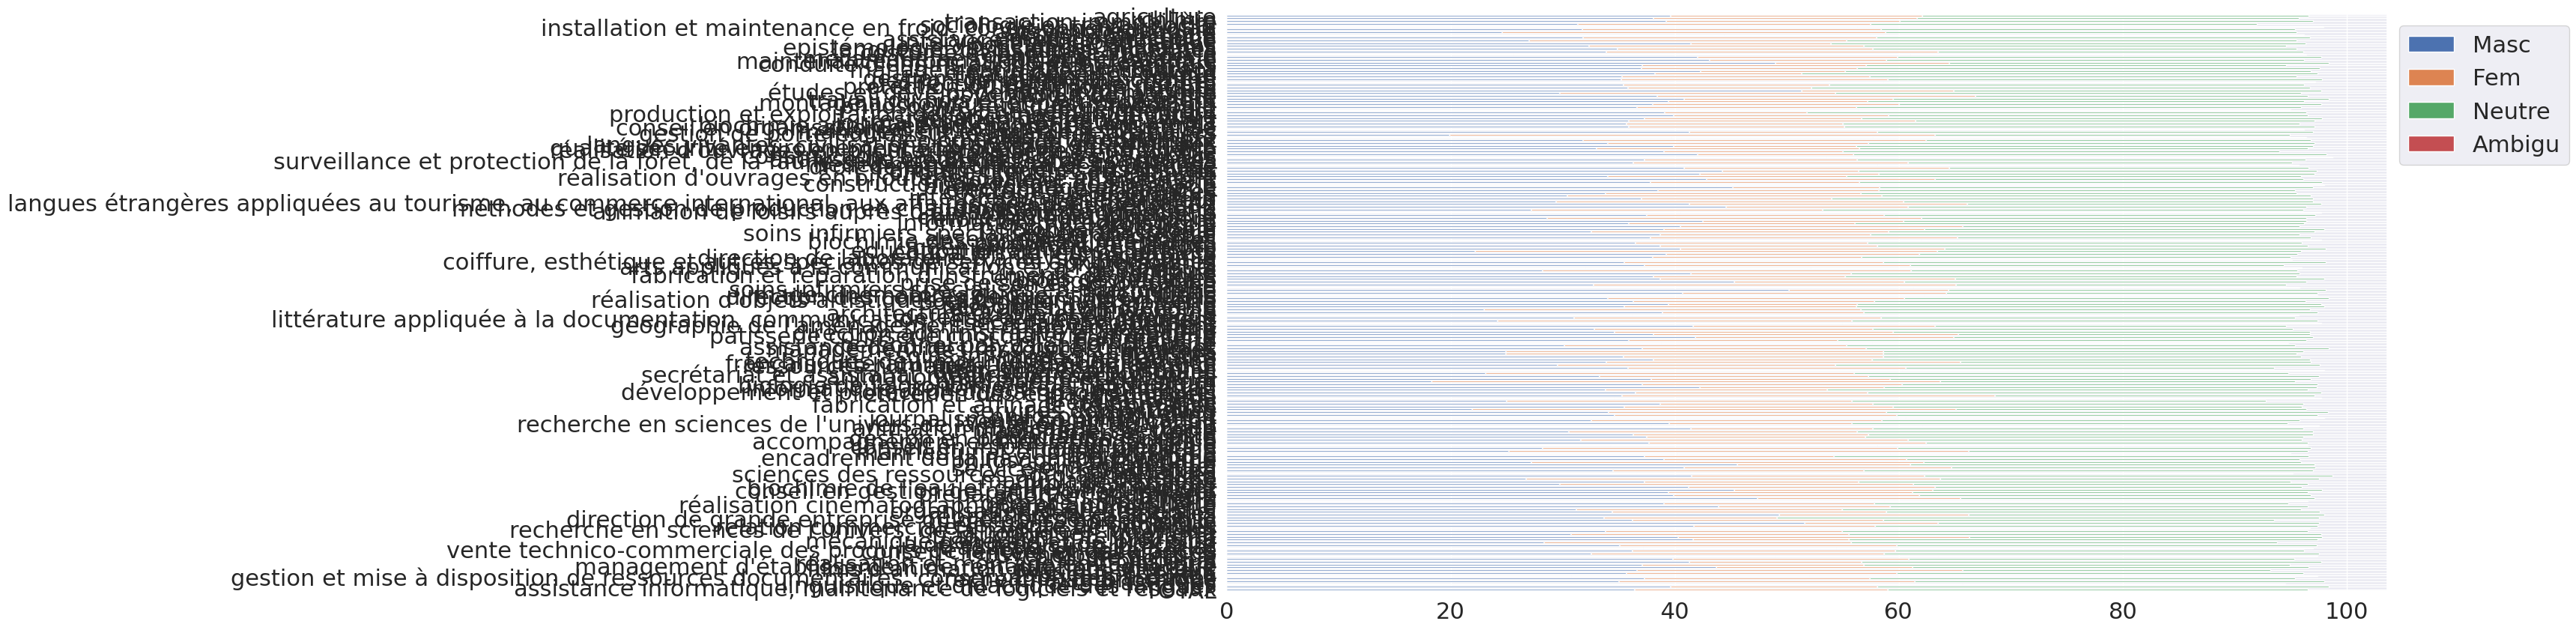

In [65]:
for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"
        
table_new = [{"Neutre":float(d["Neutral"][:-1]), "Fem":float(d["Feminine"][:-1]),
             "Masc":float(d["Masculine"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
#print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True)
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
ax.plot()

## Gender Gap

In [66]:
def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['theme']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} 
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap

all_sorted_gap, all_masc_gap, all_fem_gap = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))

184 23


### FIELDS RANKED FROM HIGHEST TO LOWEST GENDER GAP

In [67]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 electricité électronique
2 études et développement informatique
3 maçonnerie
4 installation et maintenance en froid, conditionnement d'air
5 conduite de grue
6 conduite d'engins agricoles et forestiers
7 réparation de carrosserie
8 électricite, électronique
9 conduite d'engins de chantier
10 direction de chantier du btp
11 éclairage spectacle
12 soudage manuel
13 prise de son et sonorisation
14 electricité, électronique
15 boucherie
16 bûcheronnage et élagage
17 pose de canalisations
18 métré en métallerie
19 méthodes et gestion de production en chaudronnerie et métallerie
20 construction, bâtiment et travaux publics
21 mécanique générale et de précision
22 conseil en gestion de patrimoine financier
23 maintenance informatique et bureautique
24 fabrication et réparation d'instruments de musique
25 production et exploitation de systèmes d'information
26 métallurgie
27 films d'animation et effets spéciaux
28 réalisation et montage en tuyauterie
29 informatique, traitement de l'informat

In [68]:
### FIELDS RANKED FROM HIGHEST TO LOWEST POSITIVE GENDER GAP = BIASED TOWARDS MASC
for i, el in enumerate(all_masc_gap[:20]):
    print(i+1,el[0])

1 electricité électronique
2 études et développement informatique
3 maçonnerie
4 installation et maintenance en froid, conditionnement d'air
5 conduite de grue
6 conduite d'engins agricoles et forestiers
7 réparation de carrosserie
8 électricite, électronique
9 conduite d'engins de chantier
10 direction de chantier du btp
11 éclairage spectacle
12 soudage manuel
13 prise de son et sonorisation
14 electricité, électronique
15 boucherie
16 bûcheronnage et élagage
17 pose de canalisations
18 métré en métallerie
19 méthodes et gestion de production en chaudronnerie et métallerie
20 construction, bâtiment et travaux publics


In [69]:
### FIELDS RANKED FROM HIGHEST TO LOWEST NEGATIVE GENDER GAP = BIASED TOWARDS FEM

for i, el in enumerate(all_fem_gap[:20]):
    print(i+1,el[0])

1 esthétique
2 soins infirmiers spécialisés en puériculture
3 aide en puériculture
4 services domestiques
5 éducation de jeunes enfants
6 mannequinat et pose artistique
7 orthophonie
8 maquillage de scène
9 coiffure, esthétique et autres spécialites de services aux personnes
10 dentellerie, broderie
11 secrétariat et assistanat médical ou médico-social
12 accueil touristique
13 soins infirmiers généralistes
14 stylisme
15 diététique
16 secrétariat comptable
17 création textile
18 retouches en habillement
19 coiffure
20 communication


In [70]:
"""Latex tables"""
for i,el in enumerate(all_masc_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  electricité électronique  &  39.7 \\ \hline
2  &  études et développement informatique  &  37.7 \\ \hline
3  &  maçonnerie  &  36.0 \\ \hline
4  &  installation et maintenance en froid, conditionnement d'air  &  34.9 \\ \hline
5  &  conduite de grue  &  34.5 \\ \hline
6  &  conduite d'engins agricoles et forestiers  &  33.5 \\ \hline
7  &  réparation de carrosserie  &  32.4 \\ \hline
8  &  électricite, électronique  &  32.1 \\ \hline
9  &  conduite d'engins de chantier  &  32.0 \\ \hline
10  &  direction de chantier du btp  &  31.8 \\ \hline
11  &  éclairage spectacle  &  31.3 \\ \hline
12  &  soudage manuel  &  30.2 \\ \hline
13  &  prise de son et sonorisation  &  30.1 \\ \hline
14  &  electricité, électronique  &  29.4 \\ \hline
15  &  boucherie  &  29.3 \\ \hline
16  &  bûcheronnage et élagage  &  28.9 \\ \hline
17  &  pose de canalisations  &  28.9 \\ \hline
18  &  métré en métallerie  &  28.6 \\ \hline
19  &  méthodes et gestion de production en chaudronnerie et métallerie 

In [71]:
for i,el in enumerate(all_fem_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  esthétique  &  -27.1 \\ \hline
2  &  soins infirmiers spécialisés en puériculture  &  -25.1 \\ \hline
3  &  aide en puériculture  &  -23.4 \\ \hline
4  &  services domestiques  &  -21.3 \\ \hline
5  &  éducation de jeunes enfants  &  -19.0 \\ \hline
6  &  mannequinat et pose artistique  &  -15.8 \\ \hline
7  &  orthophonie  &  -10.6 \\ \hline
8  &  maquillage de scène  &  -10.3 \\ \hline
9  &  coiffure, esthétique et autres spécialites de services aux personnes  &  -10.0 \\ \hline
10  &  dentellerie, broderie  &  -9.8 \\ \hline
11  &  secrétariat et assistanat médical ou médico-social  &  -9.8 \\ \hline
12  &  accueil touristique  &  -9.6 \\ \hline
13  &  soins infirmiers généralistes  &  -8.8 \\ \hline
14  &  stylisme  &  -8.8 \\ \hline
15  &  diététique  &  -7.8 \\ \hline
16  &  secrétariat comptable  &  -7.4 \\ \hline
17  &  création textile  &  -5.8 \\ \hline
18  &  retouches en habillement  &  -4.8 \\ \hline
19  &  coiffure  &  -4.7 \\ \hline
20  &  communication  &  -3.5 \\

In [72]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

13.780676328502414

In [73]:
import csv

with open("sorted_gap.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(all_sorted_gap)

In [74]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[]

Masculine    Neutral    Feminine    Ambiguous    topic
-----------  ---------  ----------  -----------  -----------------------------------------------------------
51.6%        34.0%      11.9%       2.6%         electricité électronique
51.3%        32.8%      13.6%       2.3%         études et développement informatique
50.2%        33.7%      14.2%       1.9%         maçonnerie
45.6%        41.6%      10.7%       2.0%         installation et maintenance en froid, conditionnement d'air
49.0%        33.9%      14.5%       2.6%         conduite de grue
18.3%        31.7%      45.4%       4.6%         esthétique
18.1%        34.5%      43.2%       4.2%         soins infirmiers spécialisés en puériculture
19.9%        31.7%      43.3%       5.1%         aide en puériculture
21.9%        31.3%      43.2%       3.5%         services domestiques
22.2%        32.5%      41.2%       4.1%         éducation de jeunes enfants
[{'Ambiguous': 3.29, 'Feminine': 28.119999999999997, 'Masculine': 34.8

[]

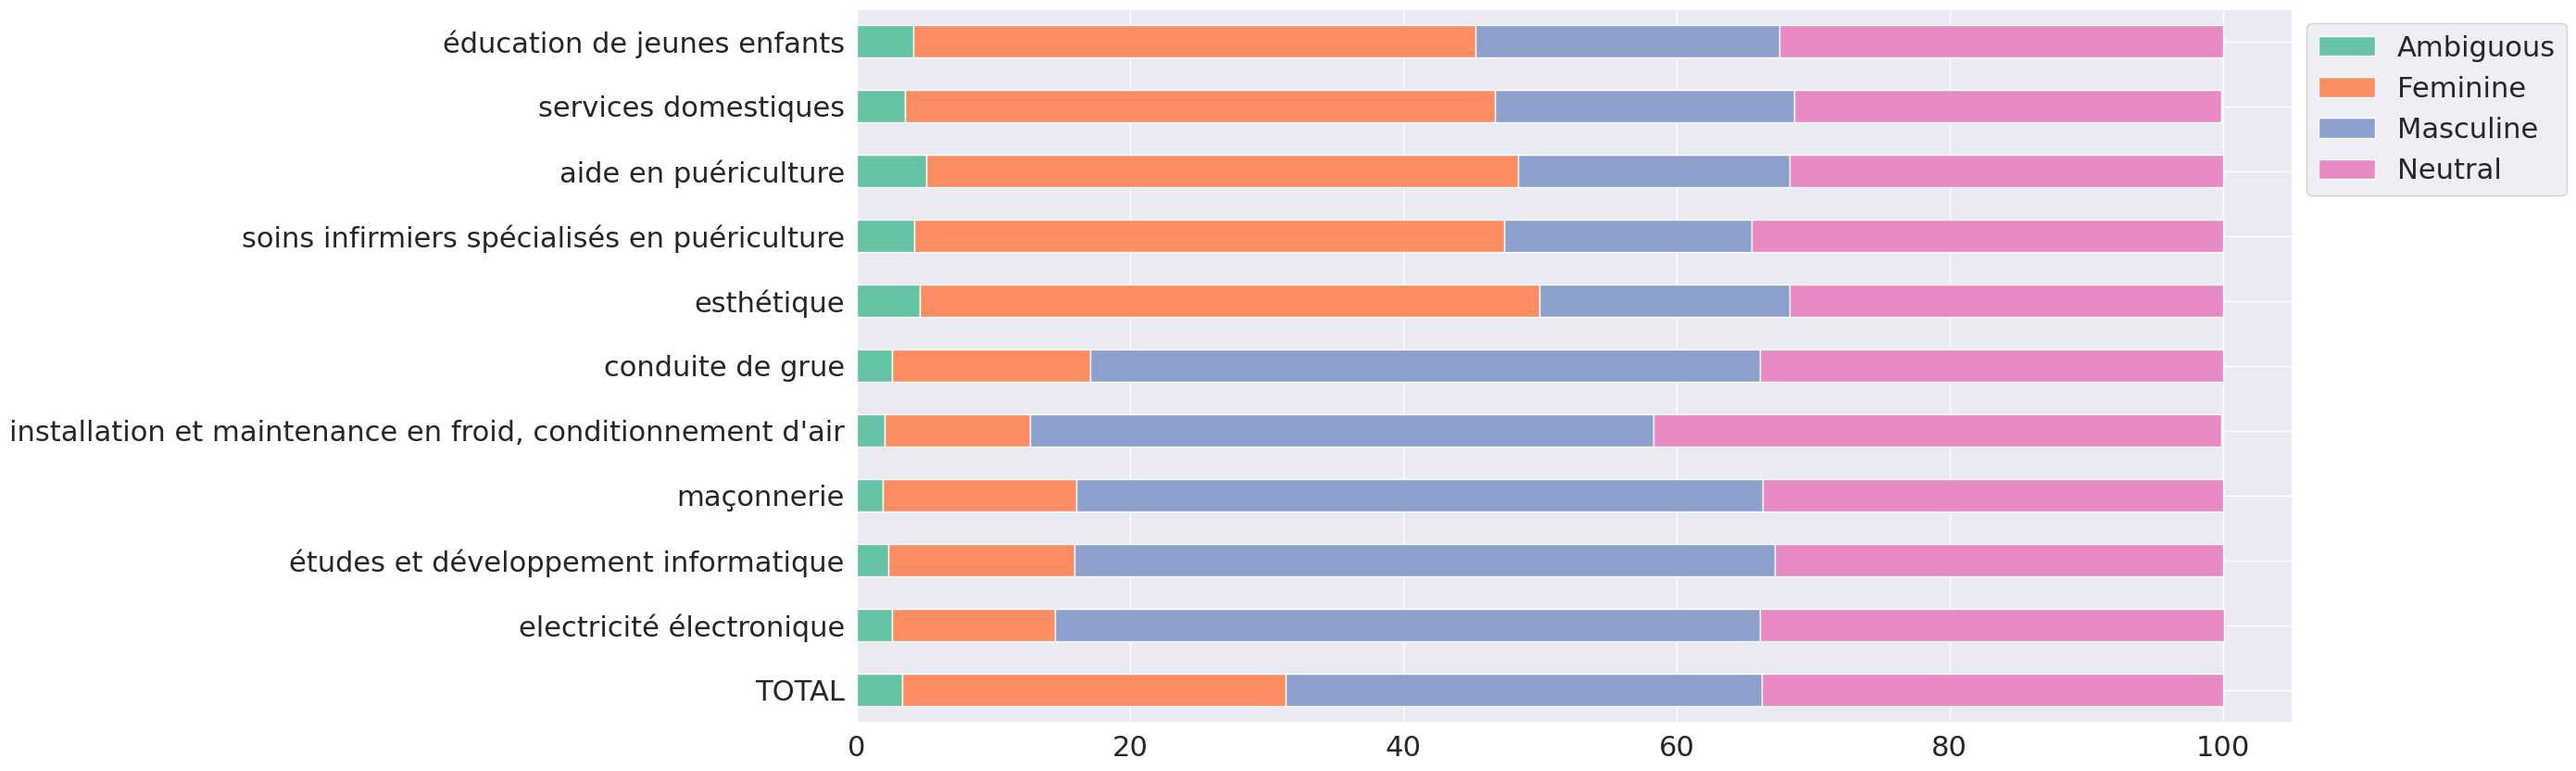

In [75]:
"""Figs and tables for these fields"""

masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/gender_per_topic_10biased.png",bbox_inches = "tight")
ax.plot()

In [76]:
means = {"total":mean_gap_total}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=mean_gap
    
means

{'total': 13.780676328502414,
 'bloom-560m': -3.0799999999999996,
 'bloom-3b': 0.8899999999999999,
 'bloom-7b': 10.5,
 'vigogne-2-7b': 28.880000000000003,
 'gpt2-fr': 19.259999999999998,
 'xglm-2': 0.48000000000000015,
 'llama-3.2-3b': 18.33,
 'llama-3.2-3b-it': 18.330000000000002,
 'gemma-2-2b': 4.079999999999998,
 'gemma-2-2b-it': 18.580000000000002,
 'mistral-7b-instruct-v0.3': -5.130000000000001,
 'mistral-7b-v0.3': -6.540000000000001,
 'croissantbase': 0.41000000000000014,
 'croissant-it': -11.27}

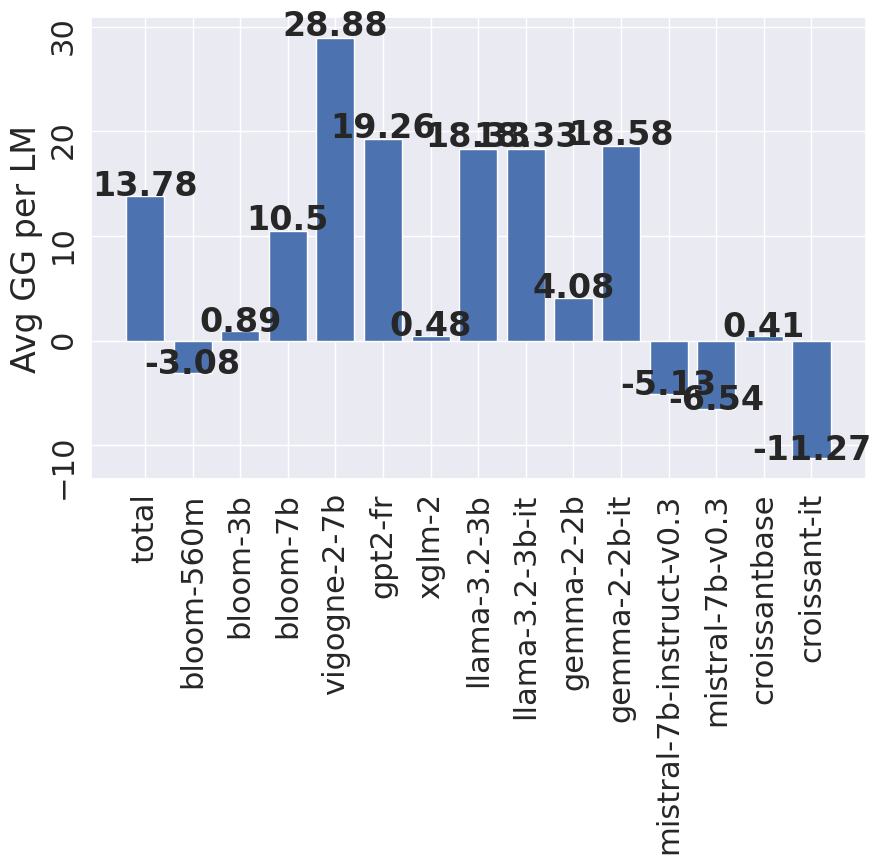

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
ax.set_ylabel("Avg GG per LM")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
#plt.savefig("fig/moy_gap_topic_model.png")

In [78]:
def viz_per_topic(dataset):
    topics = list(set(dataset["theme"]))
    #topics = biased_topics(all_topics, dataset)[0][:10] + biased_topics(all_topics, dataset)[0][-10:]
    bias = [el[0] for el in all_sorted_gap[:10]] + [el[0] for el in all_sorted_gap[-10:]]
    #print(bias)
    table = []

    for topic in topics:
        op = exploration_donnees_per_topic(dataset,label,topic)
        op['topic'] = topic
        if topic in bias:
            table.append(op)

    print(tabulate(table, headers='keys'))

    table_new = dic_list_noempty(table)

    print(table_new)
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)
        
    table_new.insert(0,total)
    #print(table_new)
    
    df = pd.DataFrame(table_new, index=["TOTAL"]+bias)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
    #ax.plot()

viz_per_topic(data_genre)

Masculine    Neutral    Feminine    Ambiguous    topic
-----------  ---------  ----------  -----------  --------------------------------------------------------------------
49.0%        33.9%      14.5%       2.6%         conduite de grue
51.6%        34.0%      11.9%       2.6%         electricité électronique
49.3%        31.8%      16.9%       2.0%         réparation de carrosserie
26.7%        33.8%      37.0%       2.6%         maquillage de scène
25.2%        30.3%      41.0%       3.5%         mannequinat et pose artistique
21.9%        31.3%      43.2%       3.5%         services domestiques
18.3%        31.7%      45.4%       4.6%         esthétique
23.0%        40.1%      33.6%       3.3%         orthophonie
50.2%        33.7%      14.2%       1.9%         maçonnerie
18.1%        34.5%      43.2%       4.2%         soins infirmiers spécialisés en puériculture
25.9%        33.3%      35.9%       4.9%         coiffure, esthétique et autres spécialites de services aux personnes


NameError: name 'dic_list_noempty' is not defined

## Per model AND field


 bloom-560m
Masculine    Neutral    Feminine    topic                                                          Ambiguous
-----------  ---------  ----------  -------------------------------------------------------------  -----------
71.4%        23.8%      4.8%        préparation en pharmacie
50.0%        36.4%                  protection du patrimoine naturel                               13.6%
55.0%        35.0%      10.0%       éclairage spectacle
60.0%        20.0%      15.0%       prise de son et sonorisation                                   5.0%
55.0%        35.0%      10.0%       conduite d'engins agricoles et forestiers
9.1%         27.3%      59.1%       maquillage de scène                                            4.5%
15.8%        26.3%      57.9%       diététique
9.1%         40.9%      50.0%       intervention socioéducative
13.6%        31.8%      54.5%       réalisation d'ouvrages en bijouterie,joaillerie et orfèvrerie
10.0%        35.0%      45.0%       costume et hab

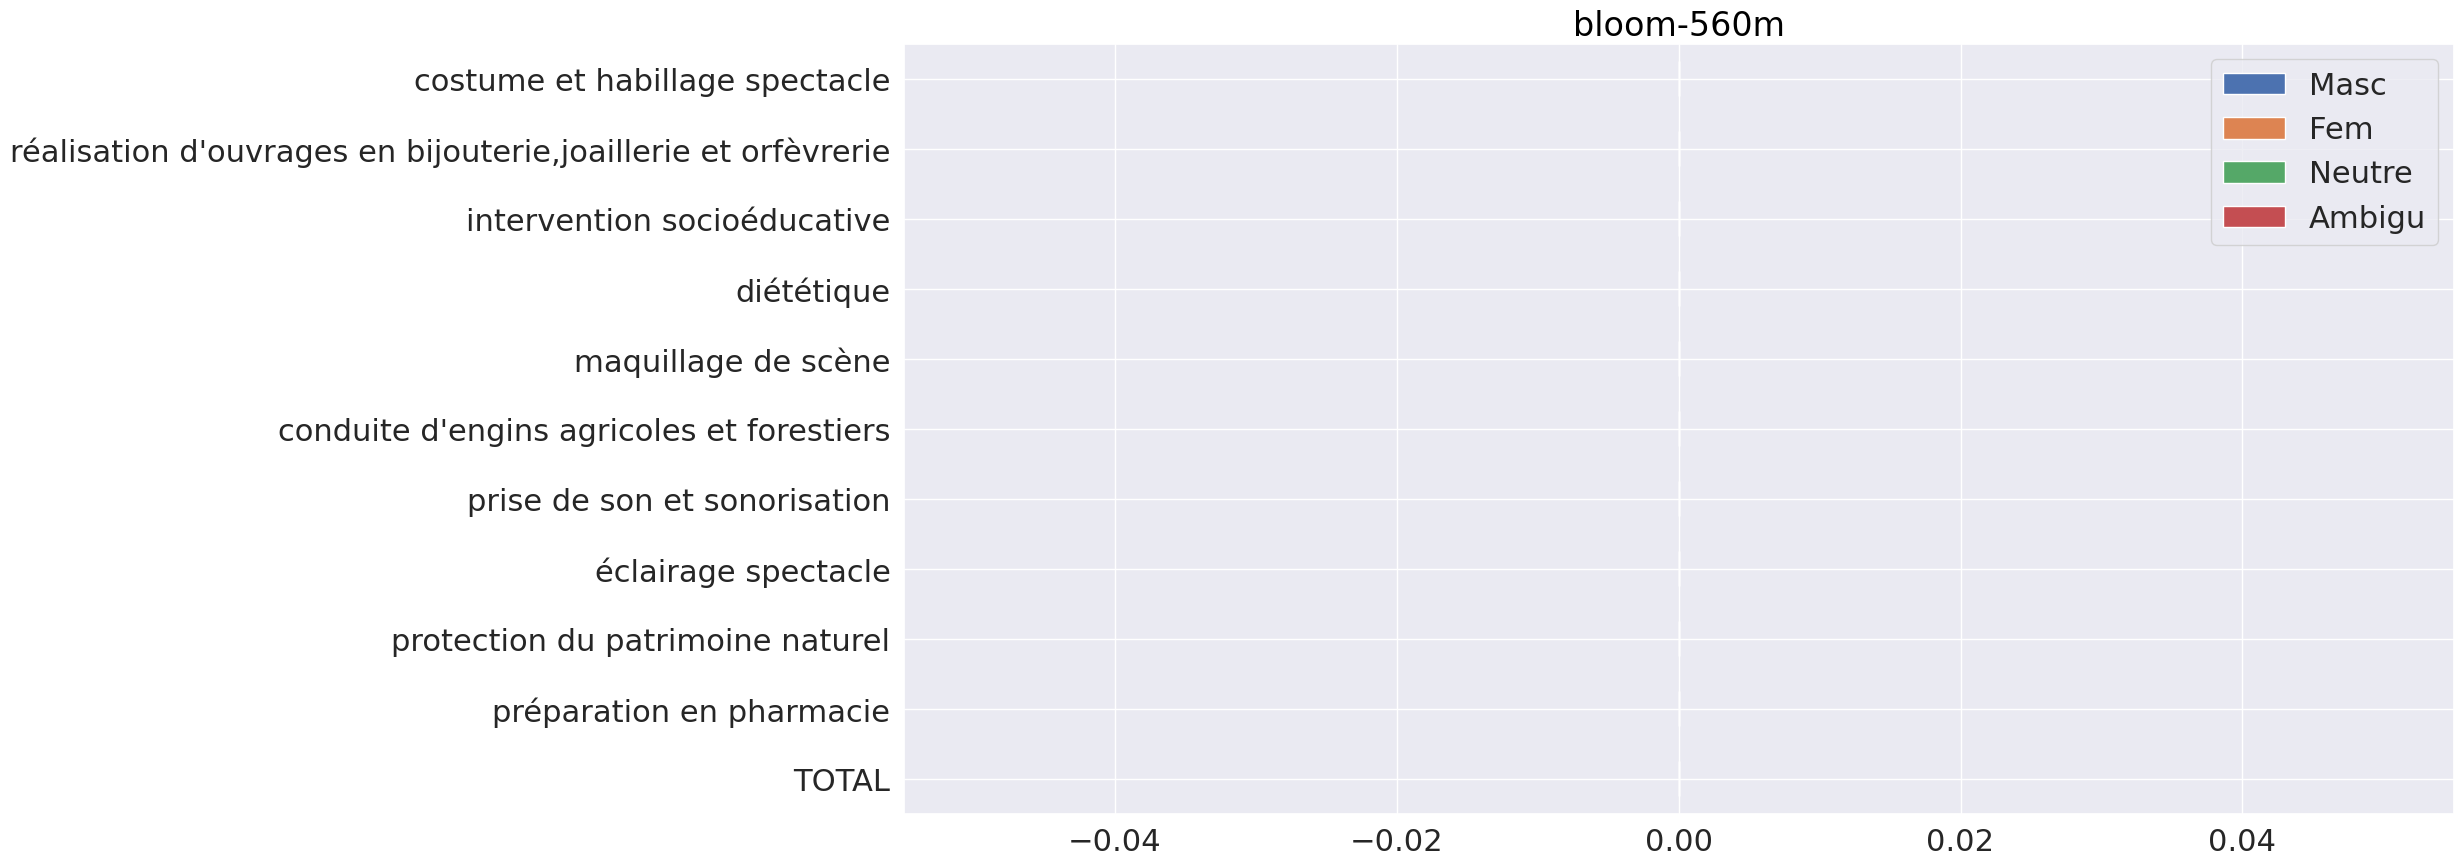

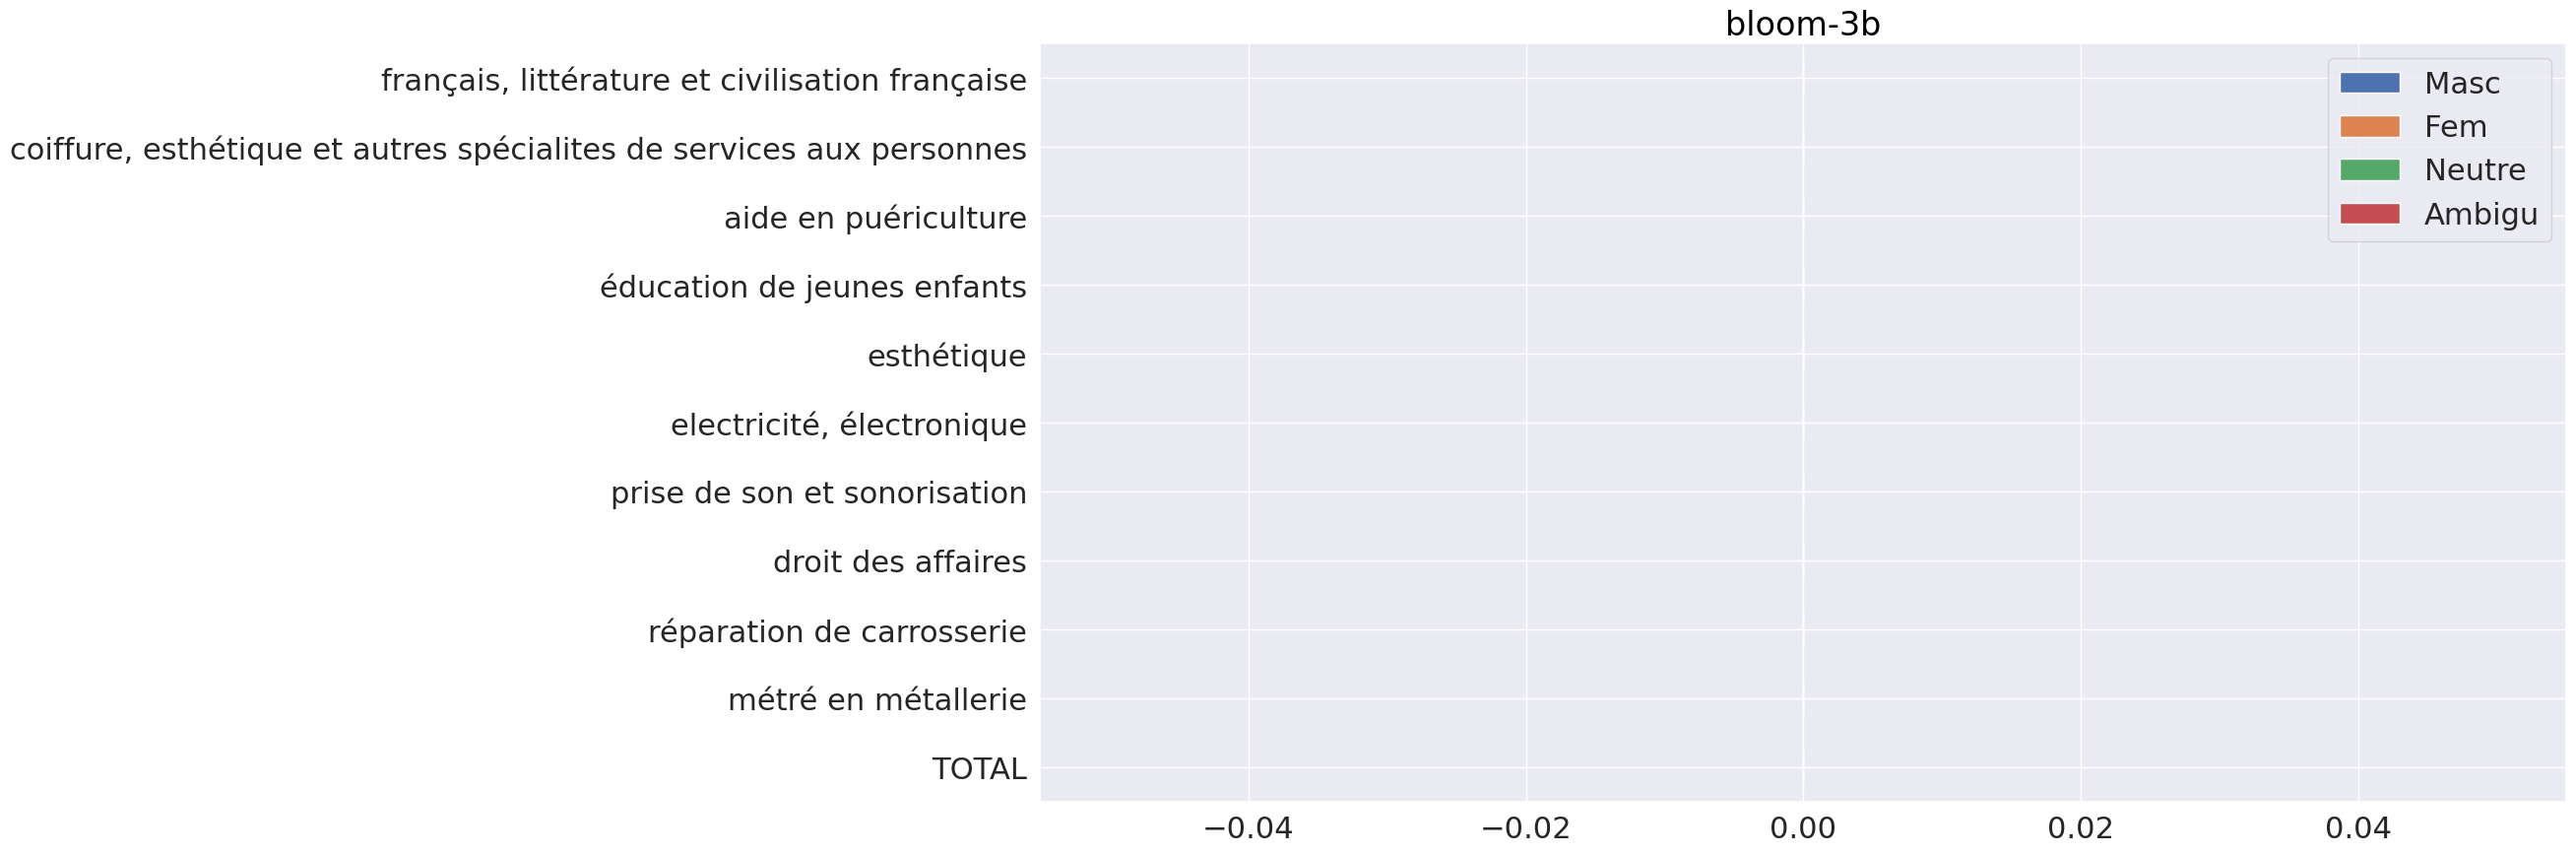

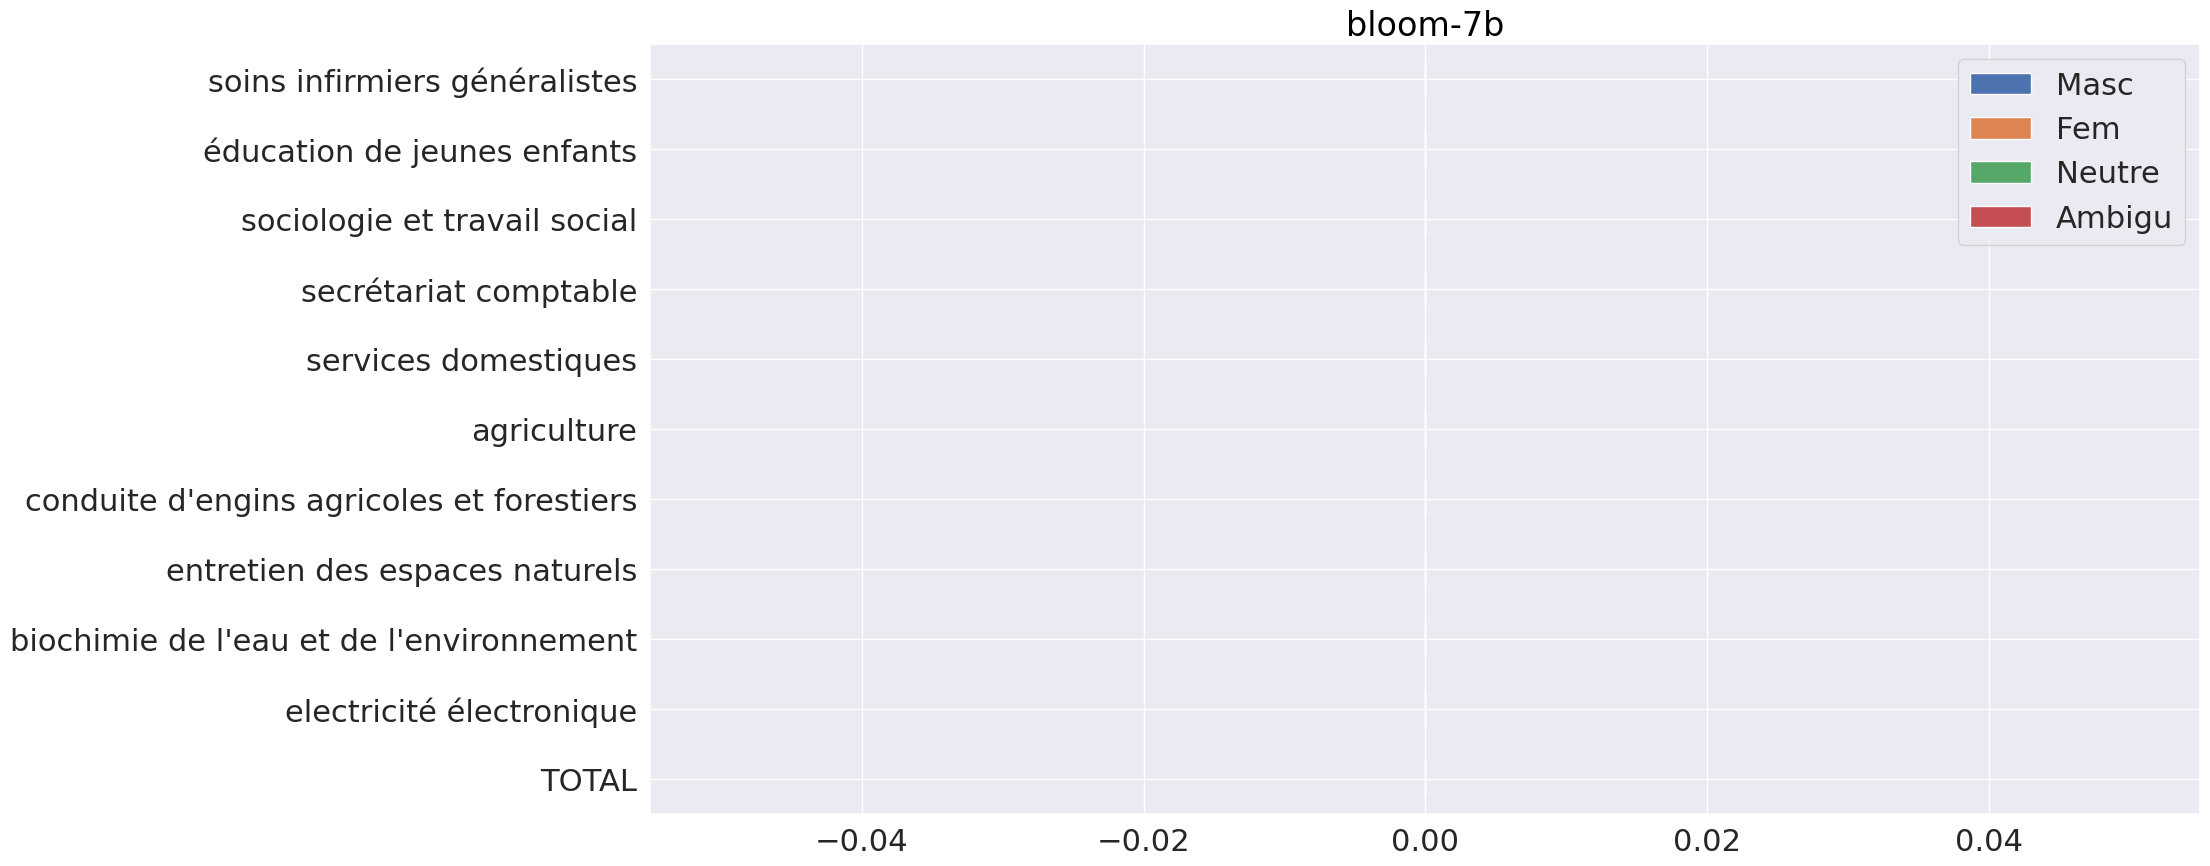

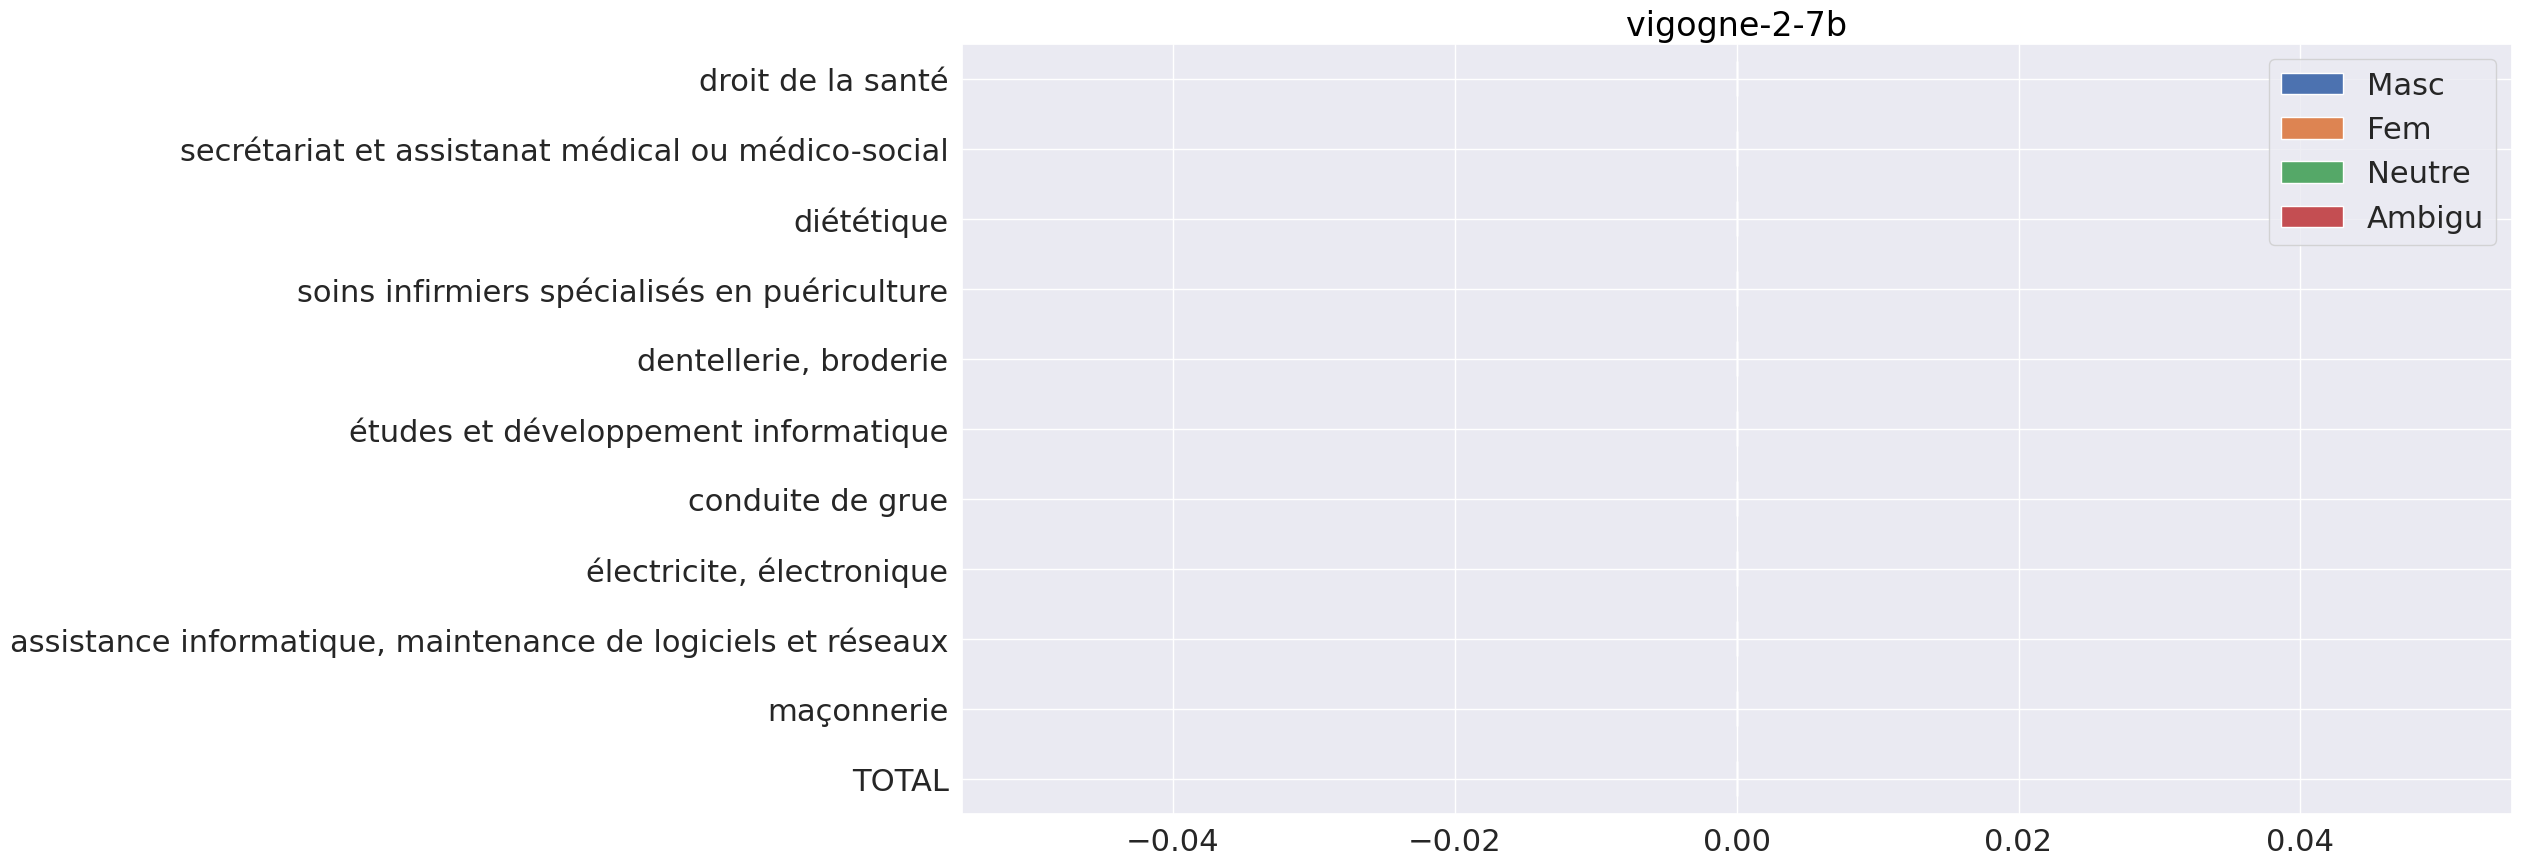

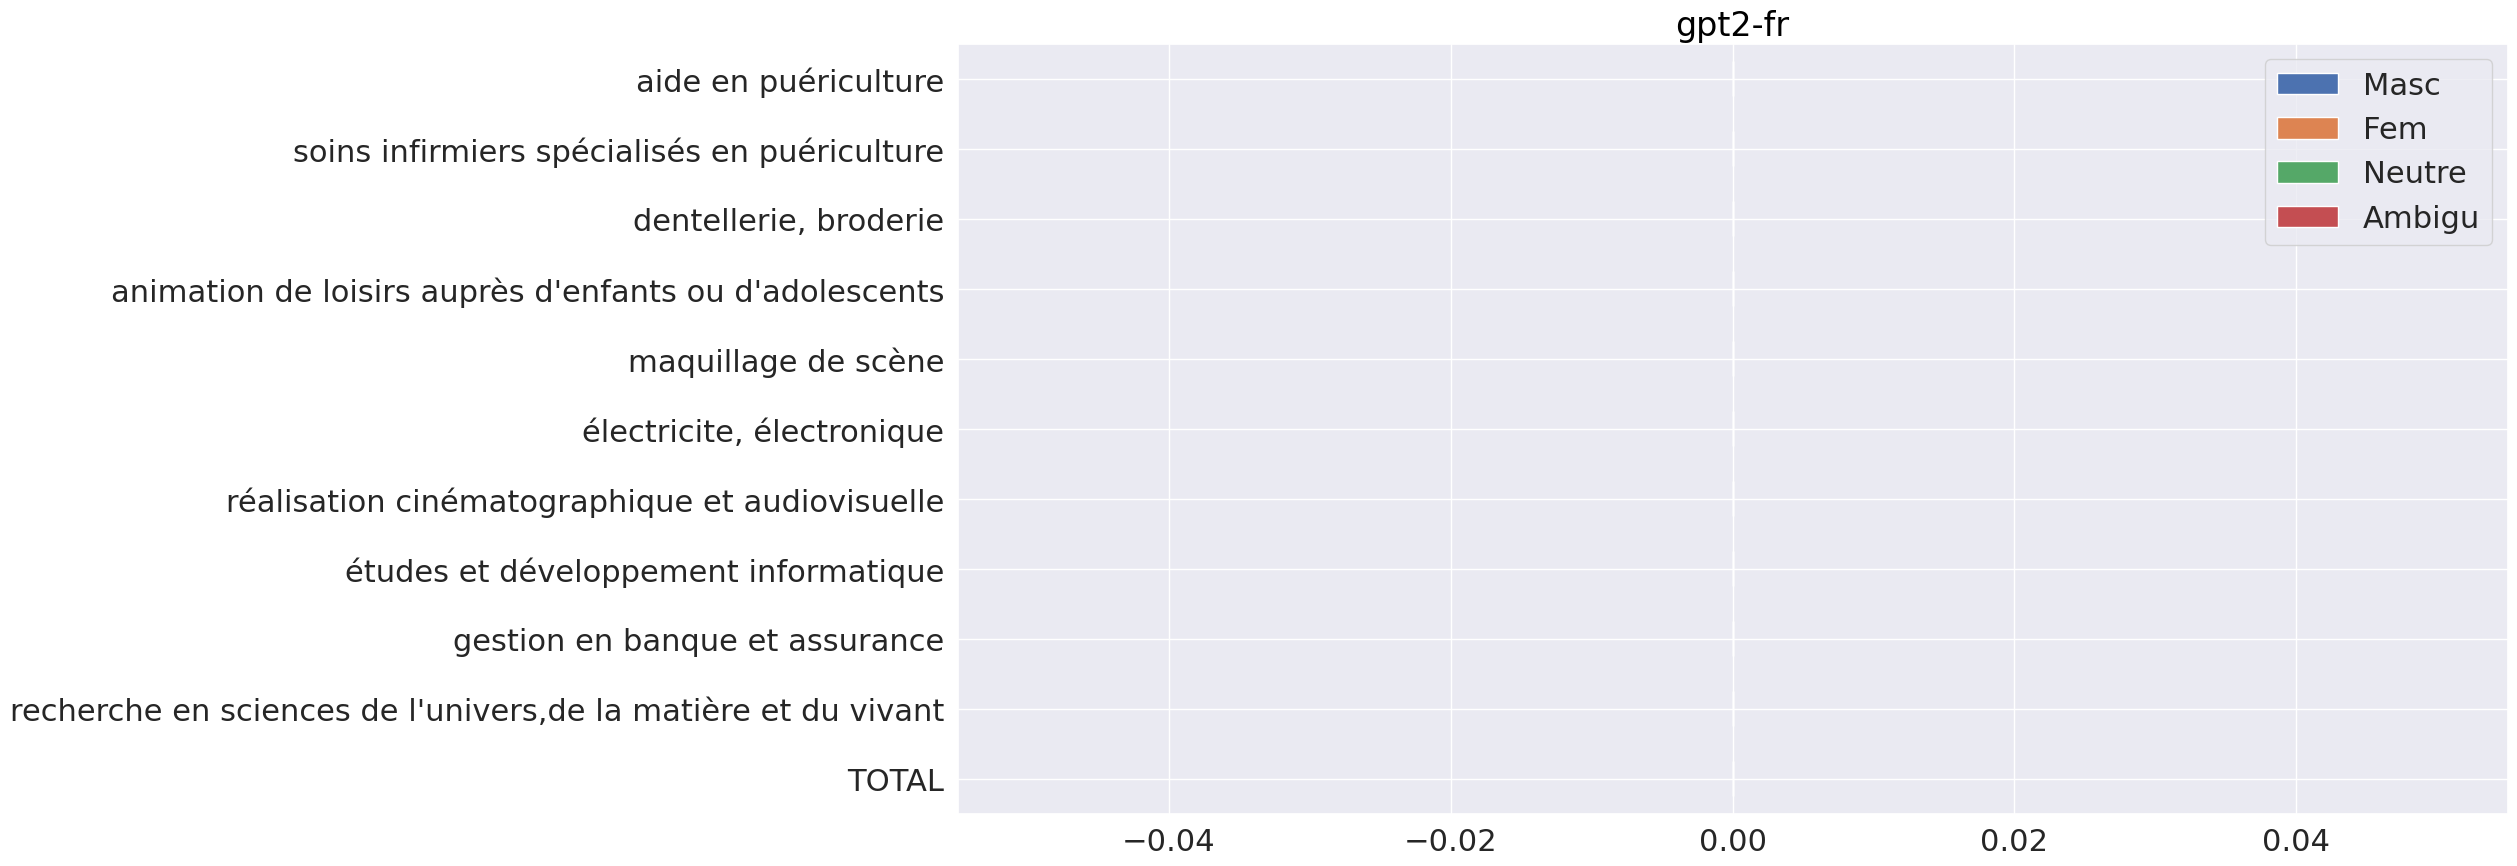

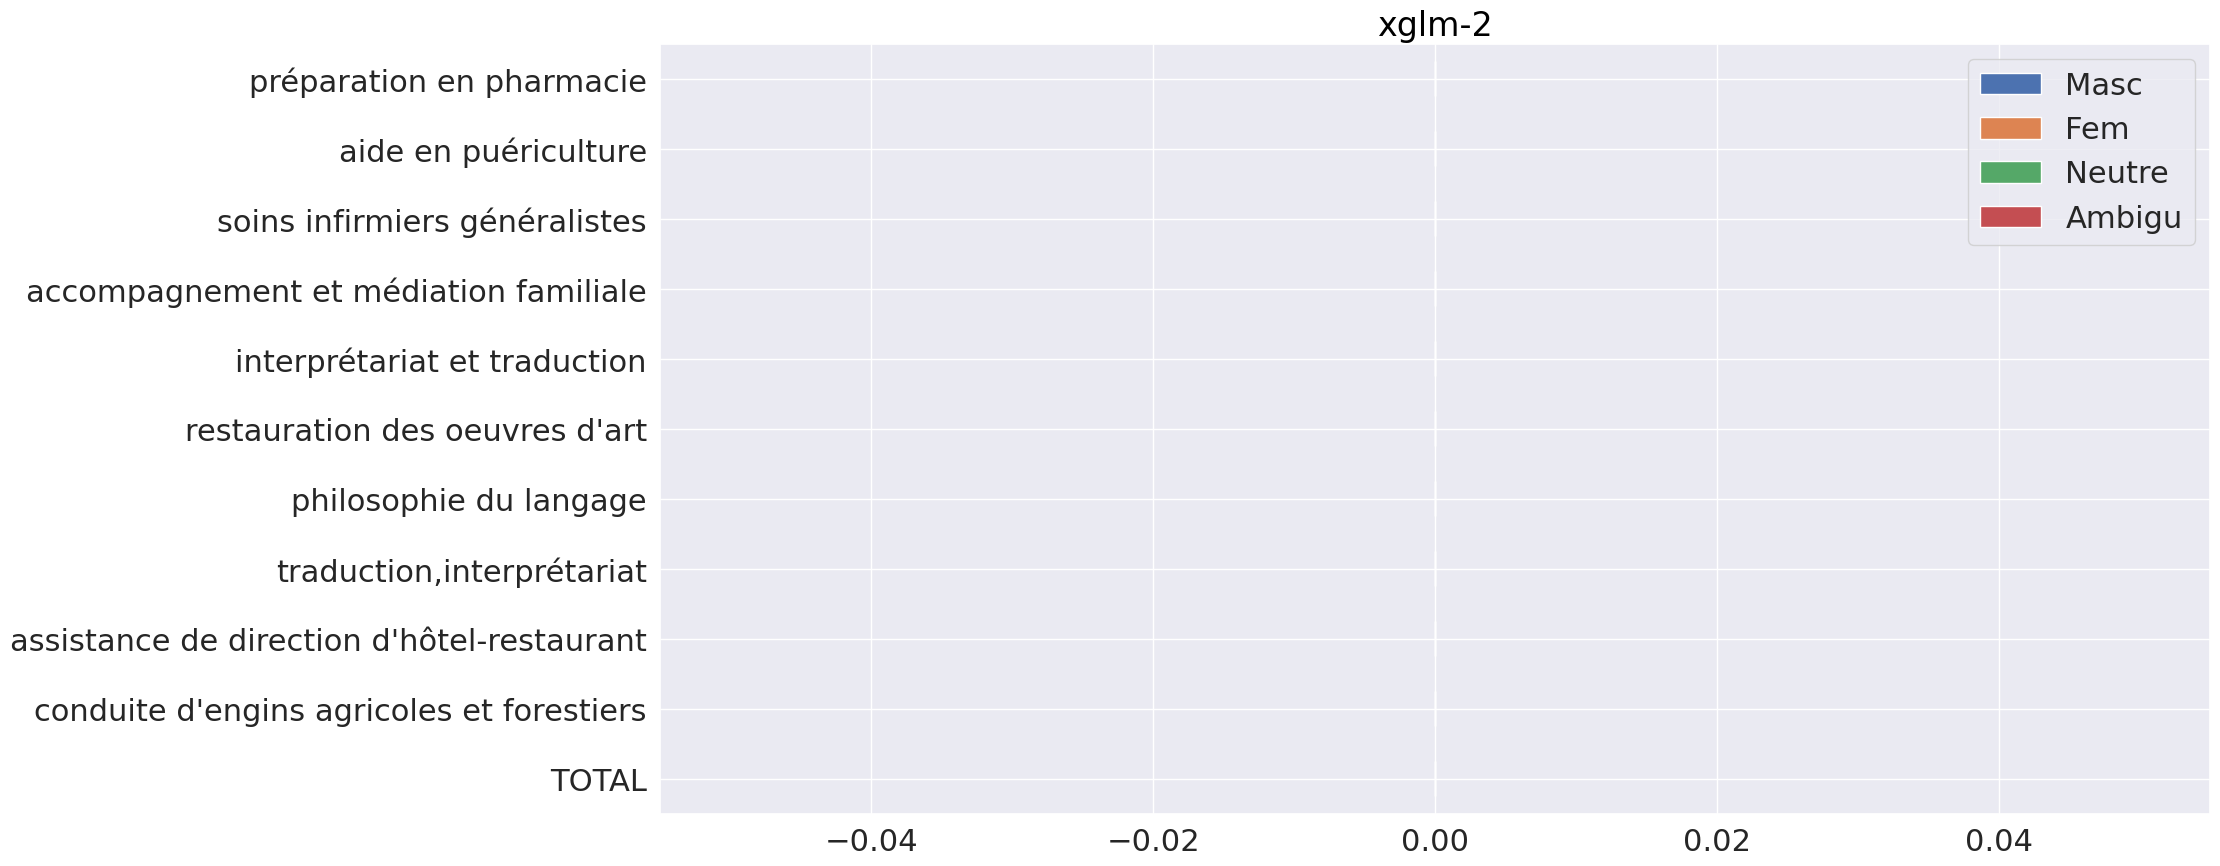

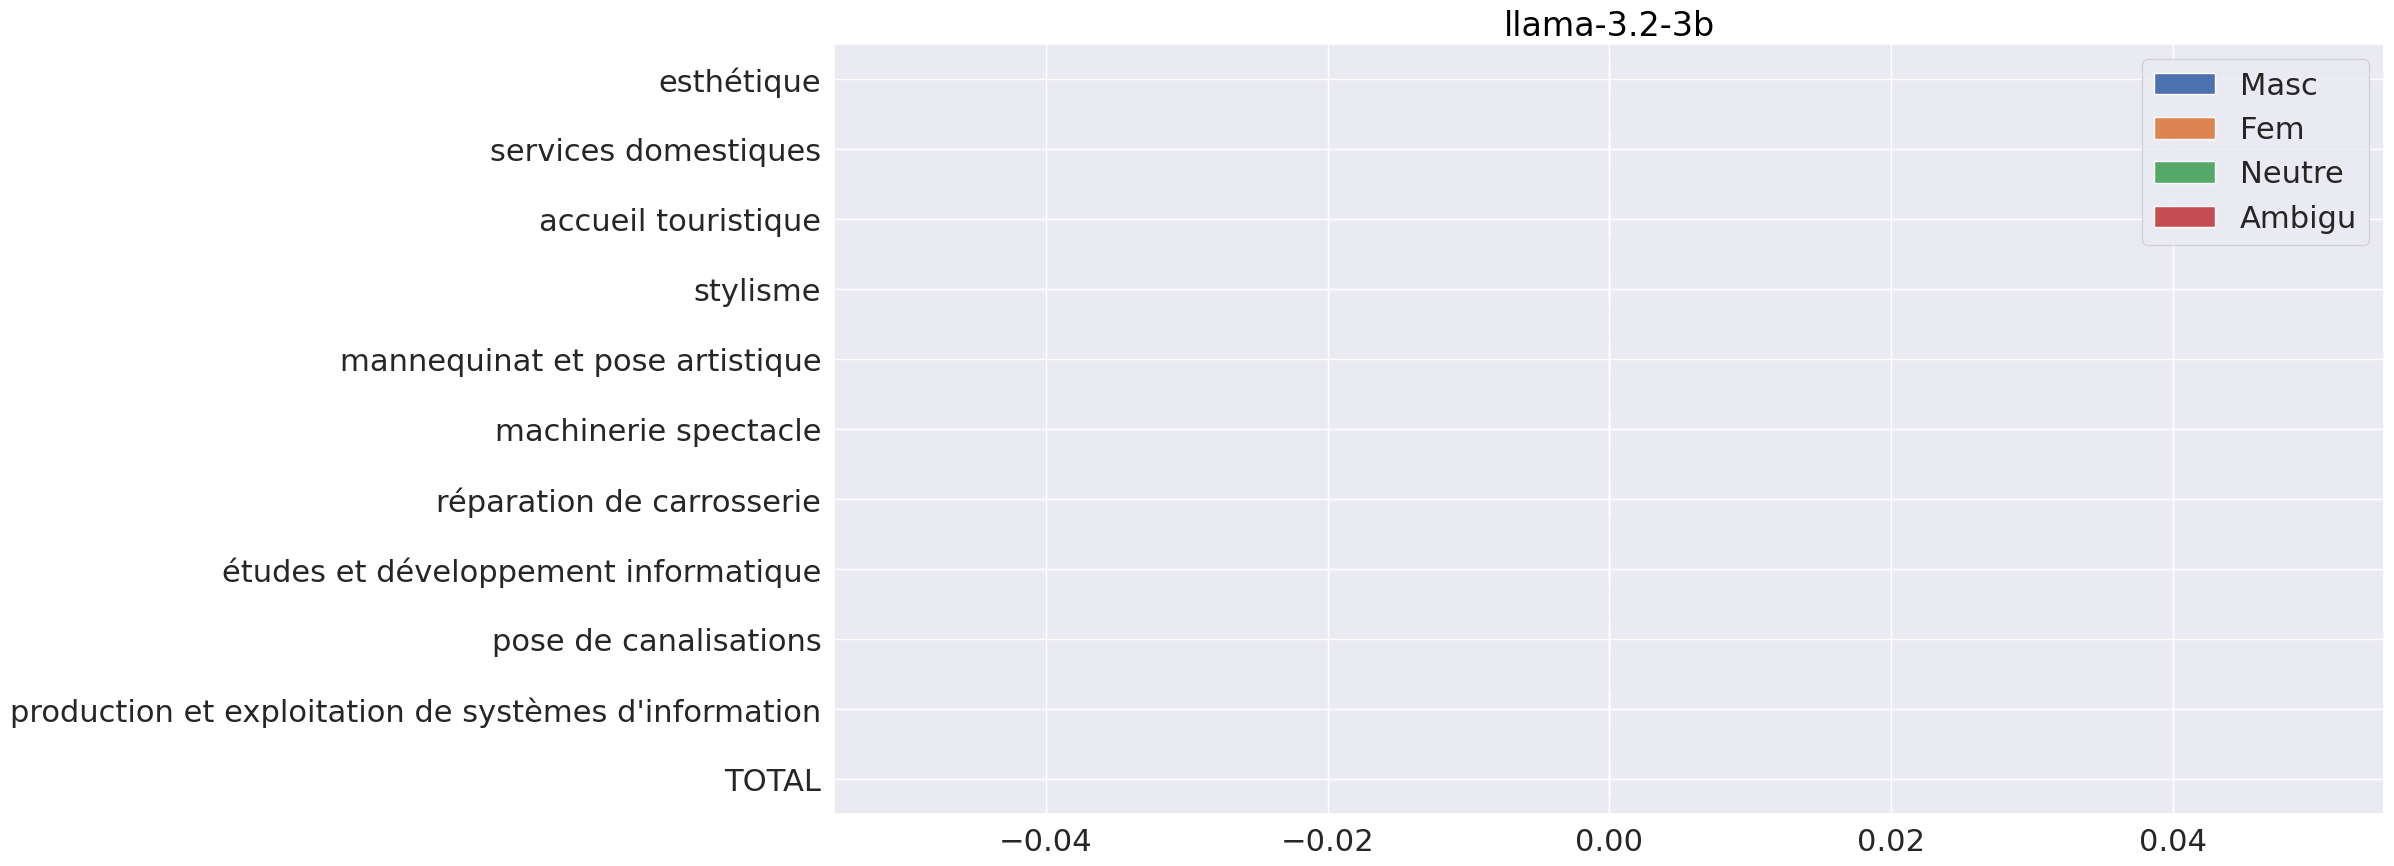

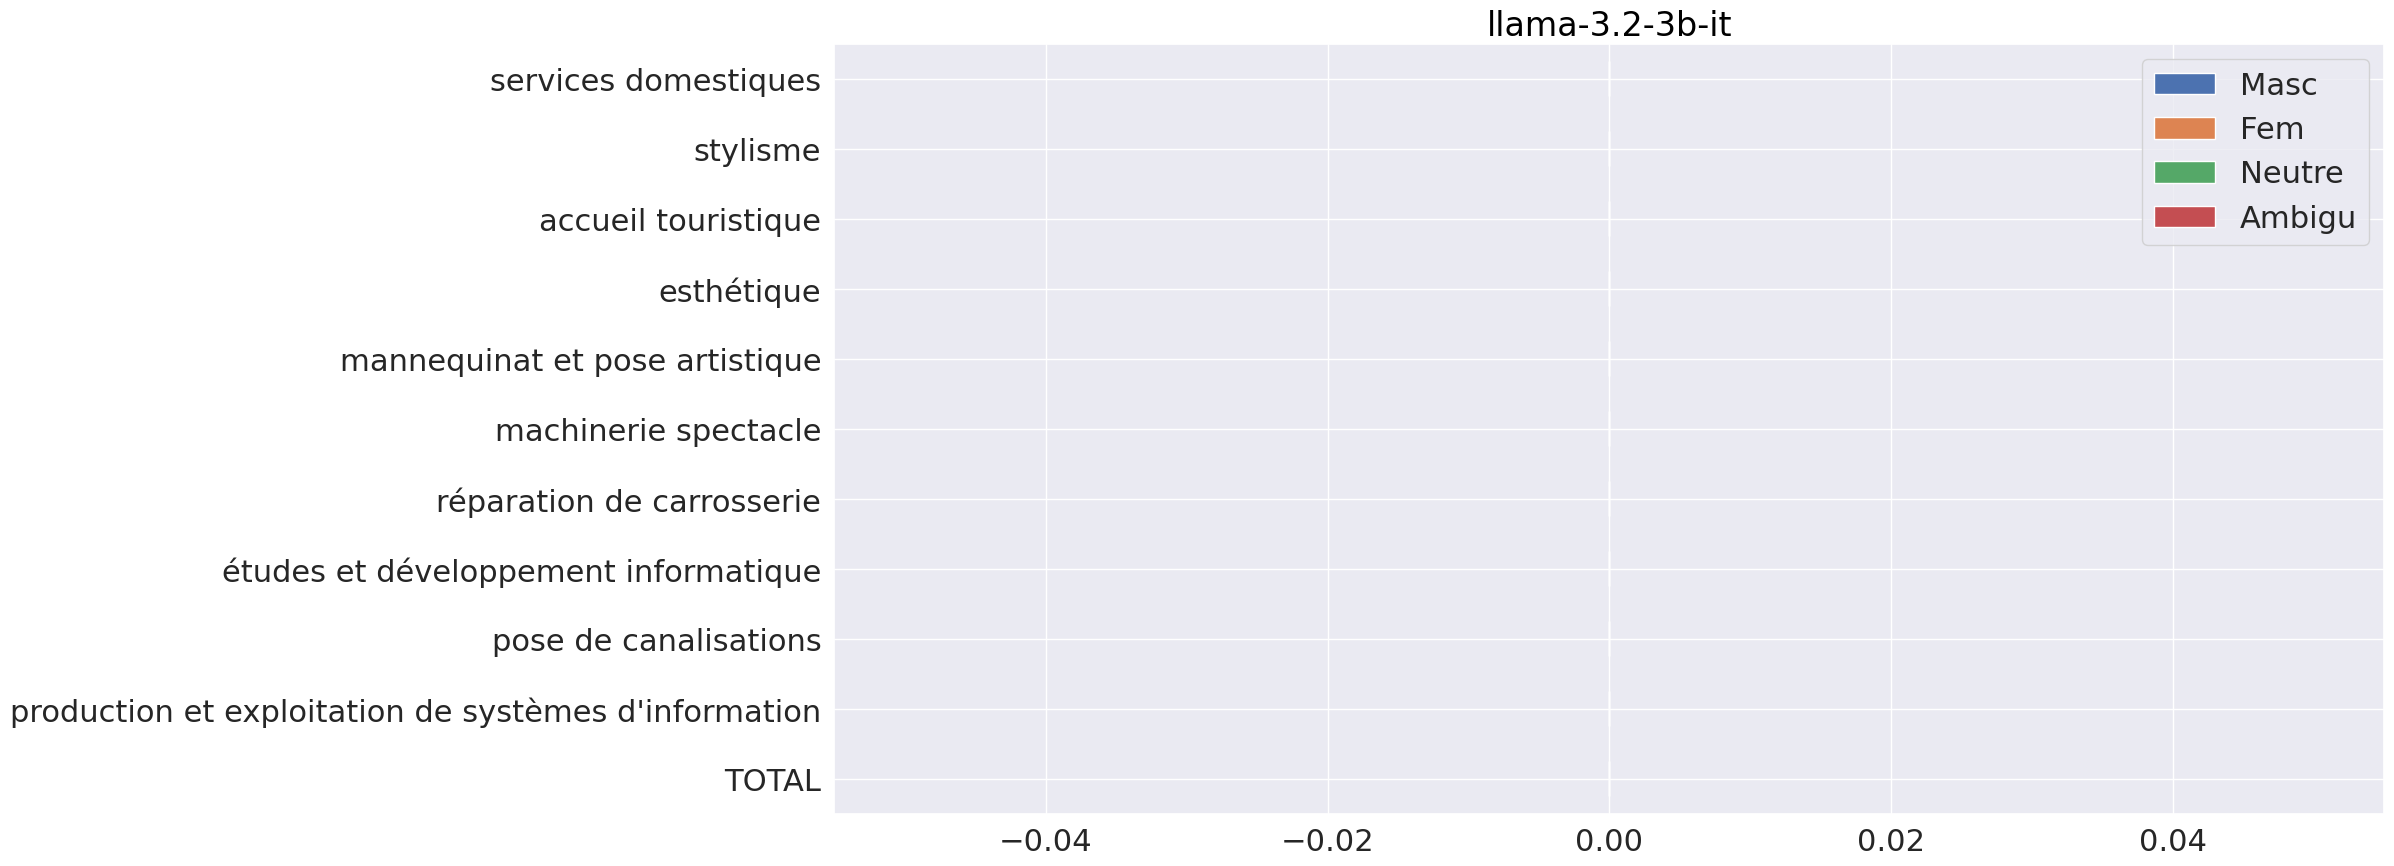

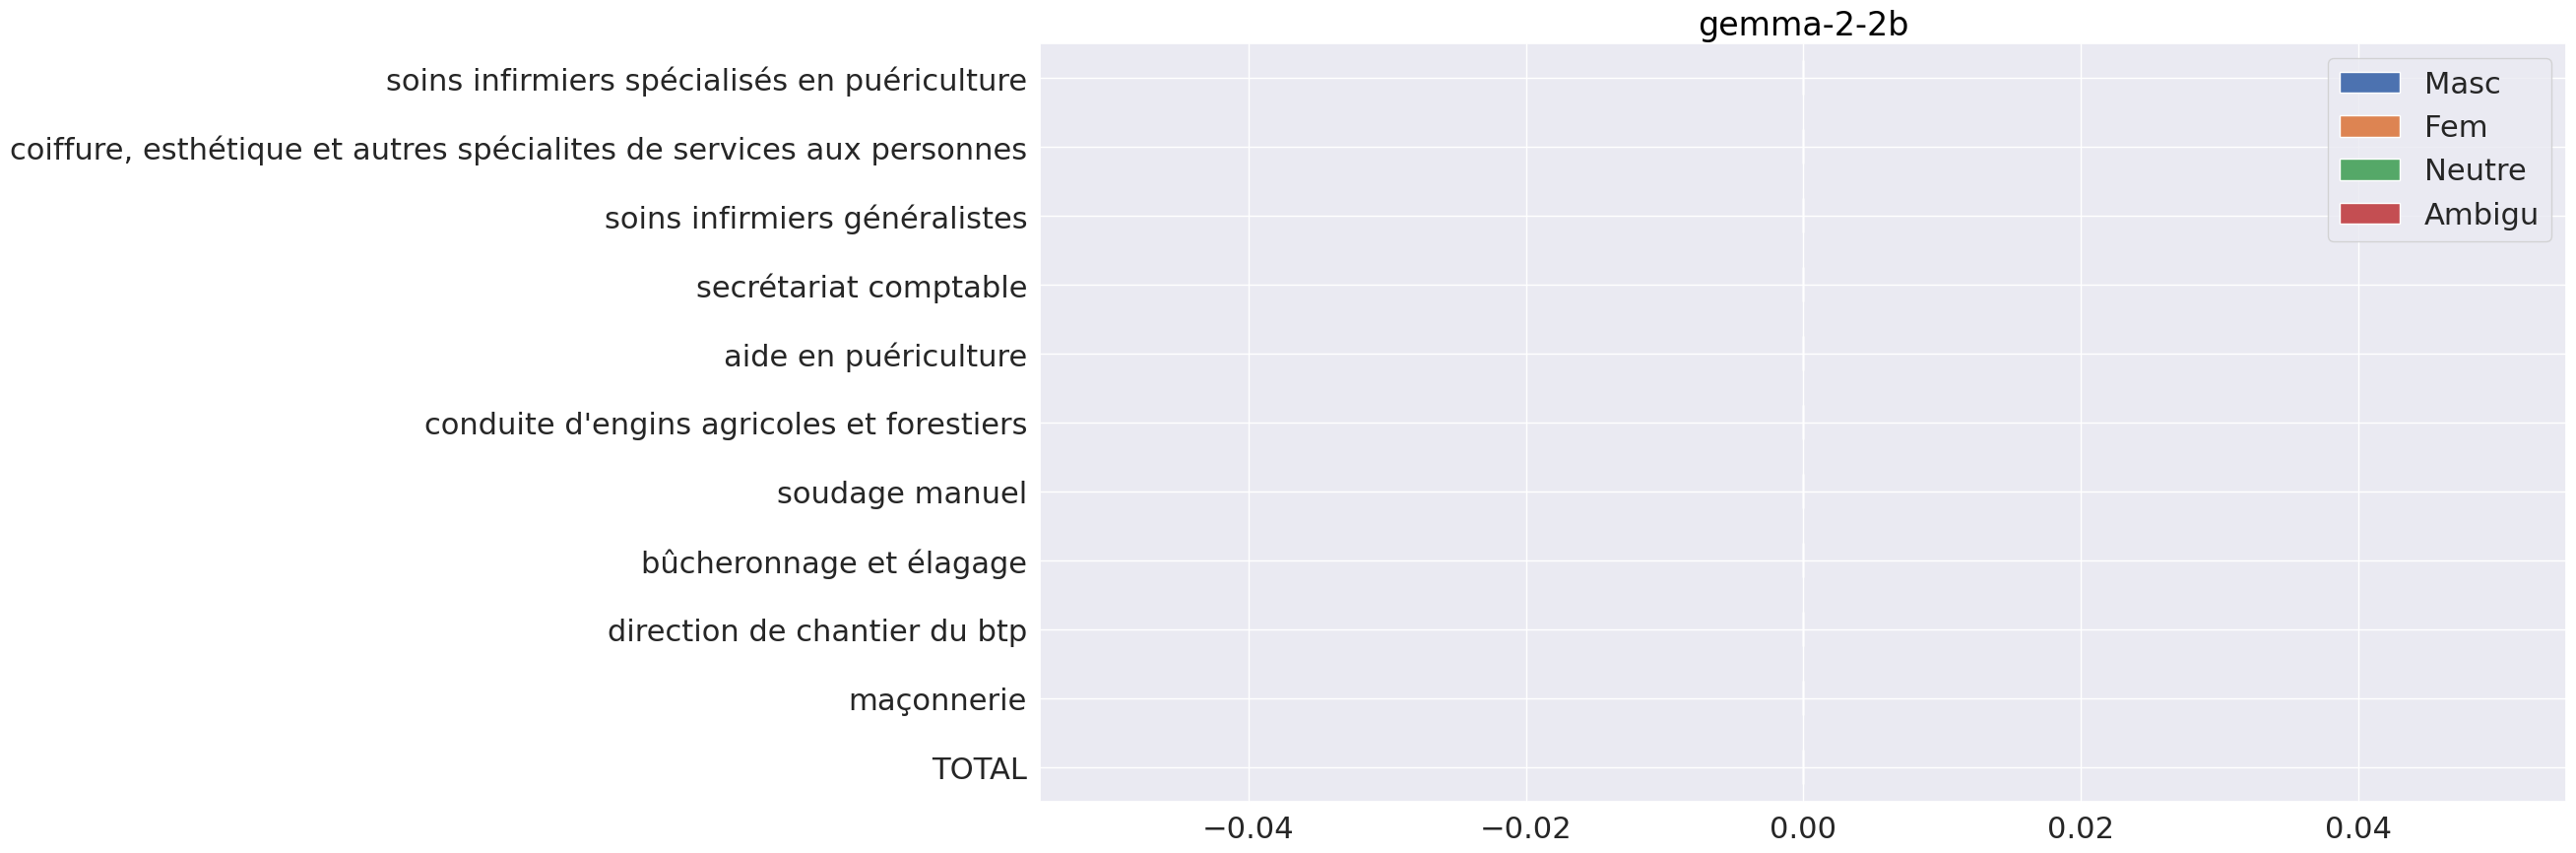

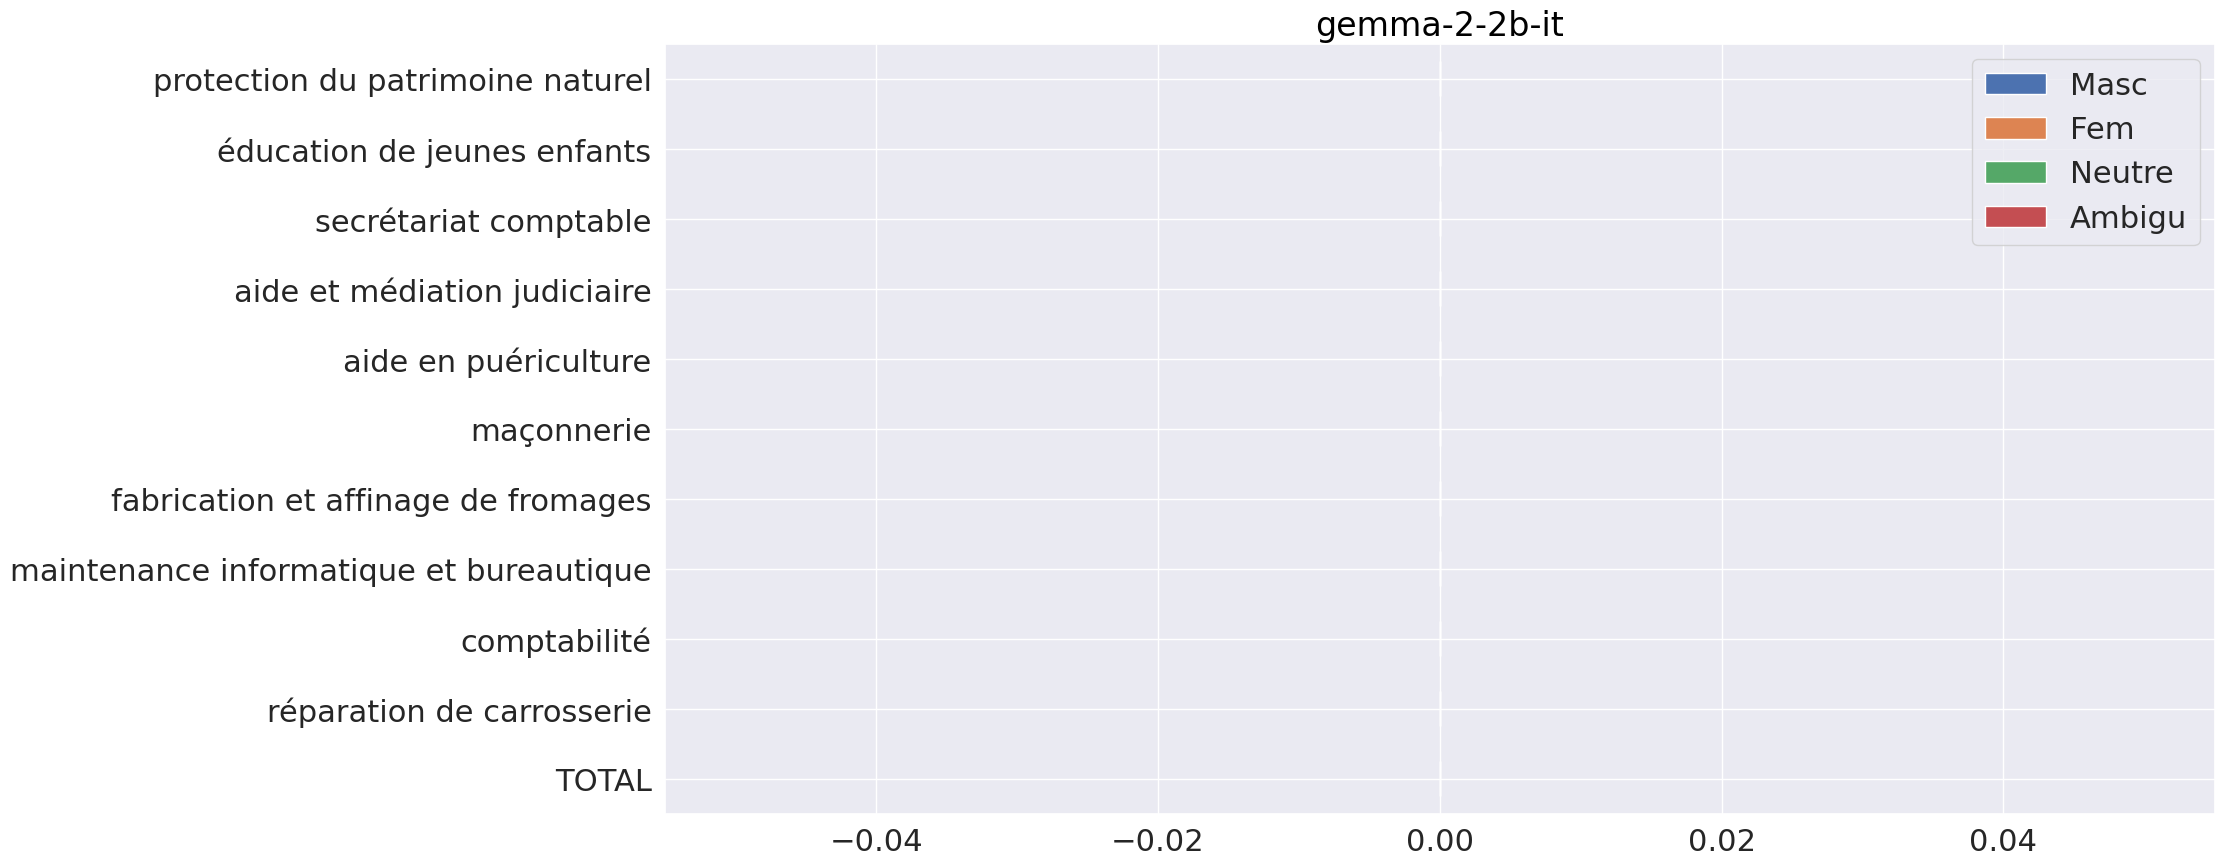

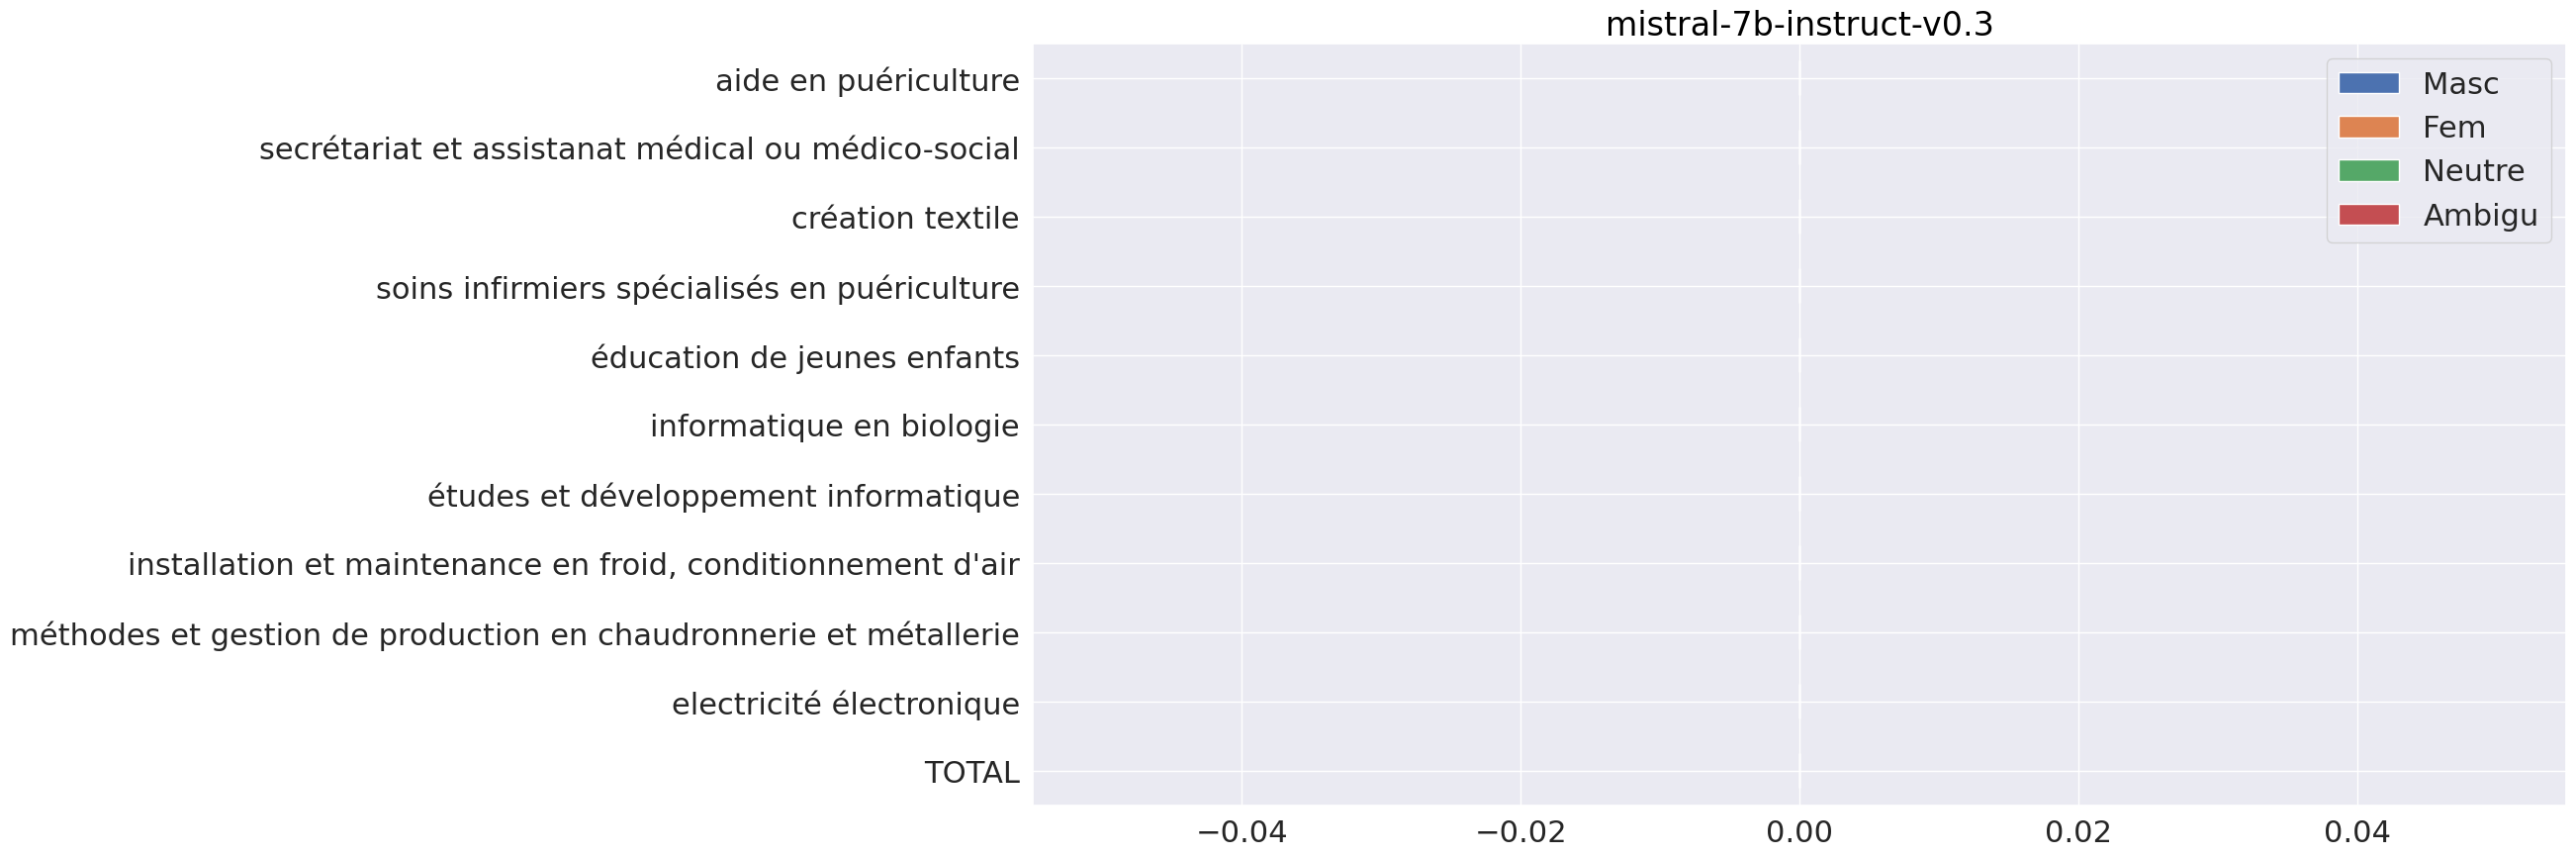

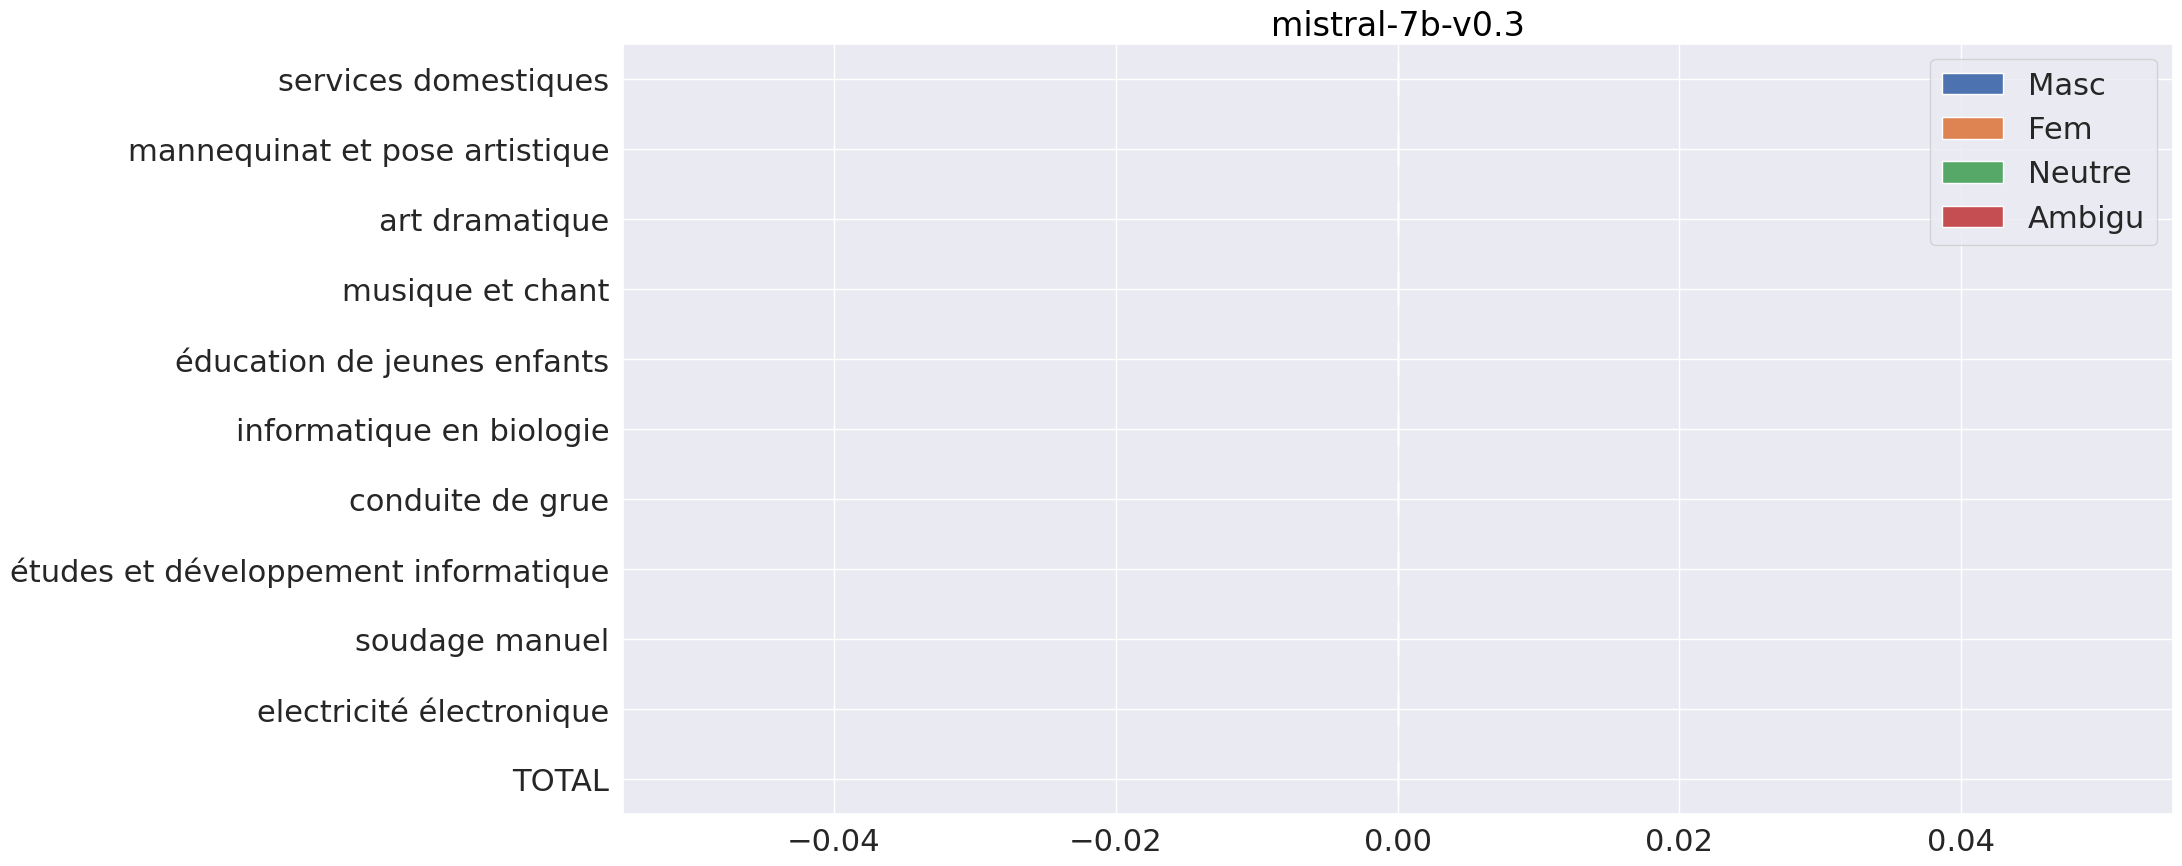

In [ ]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["theme"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["theme"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutre","Fem", "Masc","Ambigu"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutre":float(d["Neutre"][:-1]), "Fem":float(d["Fem"][:-1]),
                 "Masc":float(d["Masc"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

    """label_topics = ["secrétariat et assistanat médical" if "secrétariat et assistanat médical ou médico-social" in item else item for item in topics]
    label_topics = ["langues étrangères appliquées" if "langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation" in item else item for item in label_topics]
    label_topics = ["installation et maintenance en froid" if "conditionnement d'air" in item else item for item in label_topics]
    label_topics = ["coiffure, esthétique, services" if "autres spécialites de services" in item else item for item in label_topics]
    label_topics = ["prod. et exploit. de systèmes d'info." if "systèmes d'information" in item else item for item in label_topics]
    label_topics = ["qualité et protection santé du btp" if "protection santé du btp" in item else item for item in label_topics]
    label_topics = ["gestion de portefeuilles" if "portefeuilles" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (puériculture)" if "spécialisés en puériculture" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (anesthésie)" if "spécialisés en anesthésie" in item else item for item in label_topics]"""

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()


 conduite d'engins de chantier
Masc    Neutre    Fem    Ambigu    model
------  --------  -----  --------  ------------
47.6%   38.1%     9.5%   4.8%      bloom-560m
33.3%   57.1%     9.5%             bloom-3b
50.0%   41.7%     8.3%             gpt2-fr
27.3%   72.7%                      xglm-2
55.6%   27.8%     5.6%   11.1%     bloom-7b
60.0%   35.0%     5.0%             vigogne-2-7b
52.4%   33.3%     9.5%   4.8%      mistral

 mécanique aéronautique et spatiale
Fem    Masc    Neutre    model         Ambigu
-----  ------  --------  ------------  --------
40.0%  35.0%   25.0%     bloom-560m
9.5%   61.9%   28.6%     bloom-3b
8.3%   37.5%   54.2%     gpt2-fr
8.7%   30.4%   60.9%     xglm-2
10.5%  42.1%   42.1%     bloom-7b      5.3%
13.6%  50.0%   31.8%     vigogne-2-7b  4.5%
10.0%  45.0%   45.0%     mistral

 conduite d'engins agricoles et forestiers
Masc    Neutre    Fem    model         Ambigu
------  --------  -----  ------------  --------
55.0%   35.0%     10.0%  bloom-560m
52.2%   

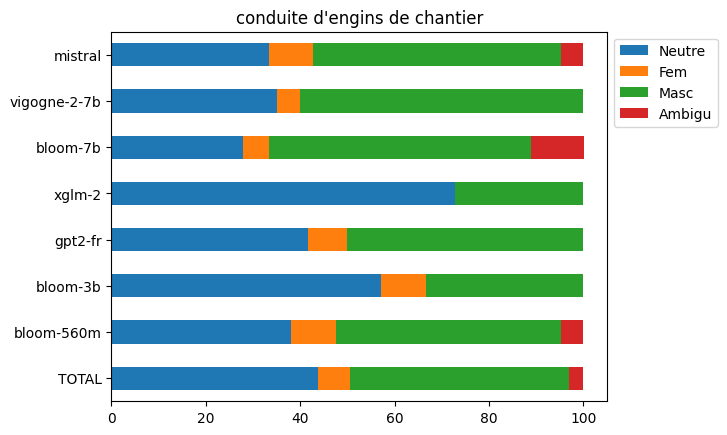

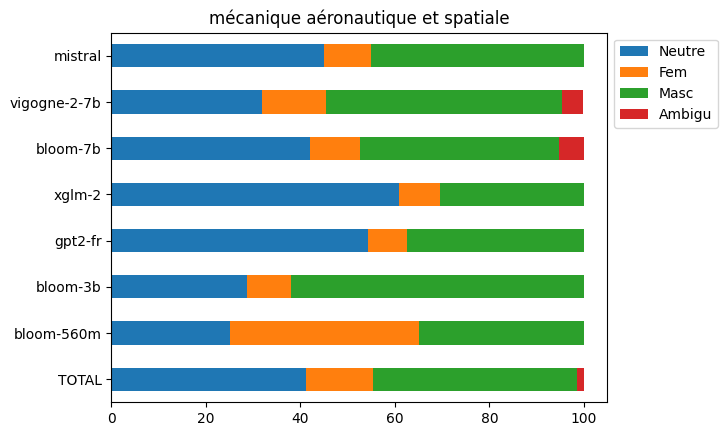

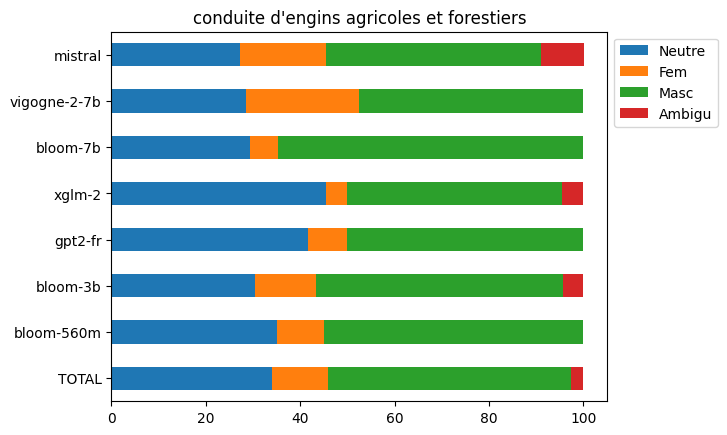

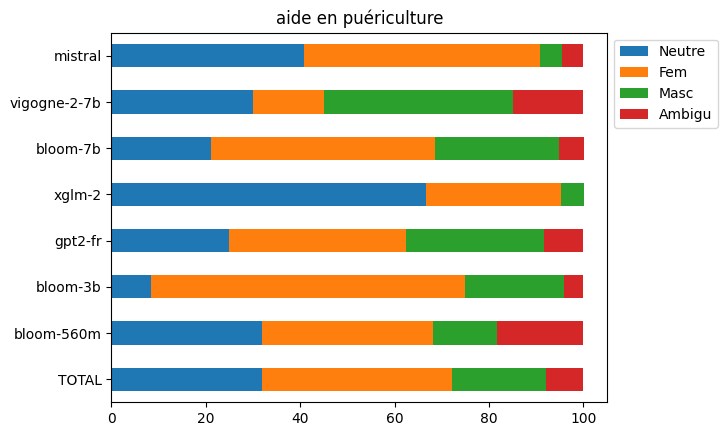

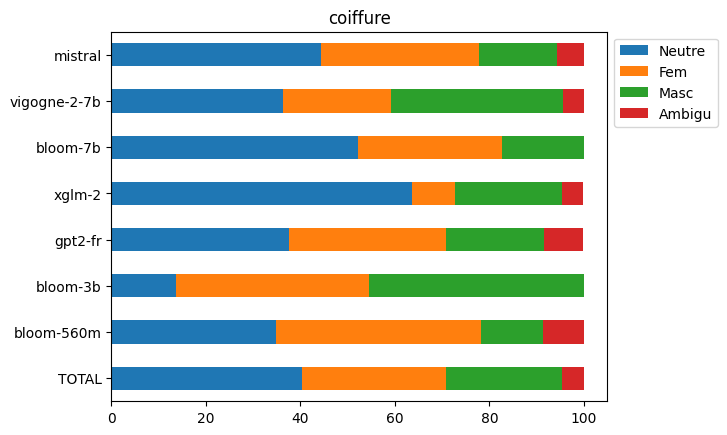

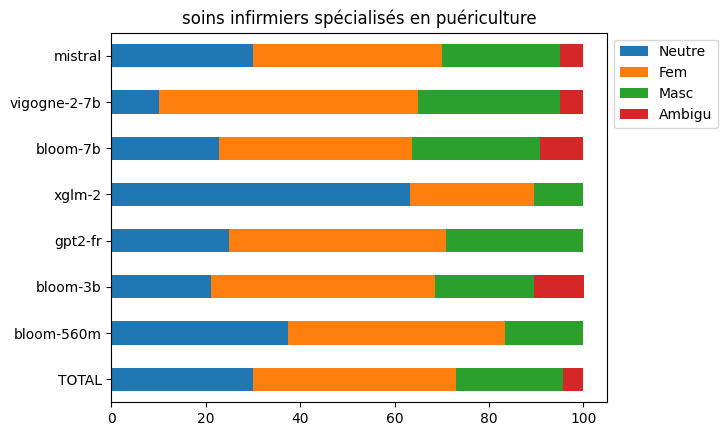

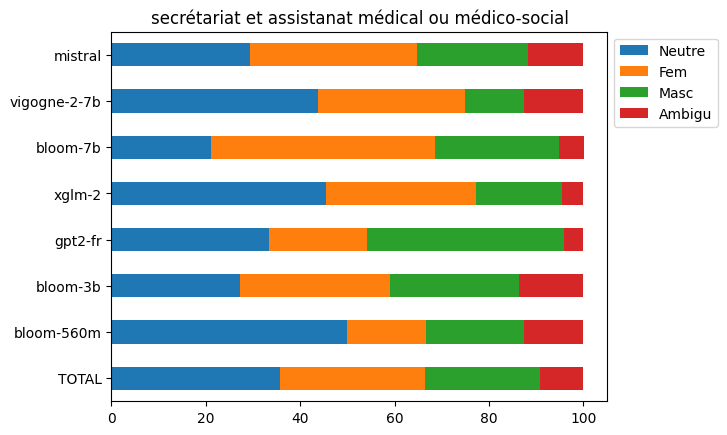

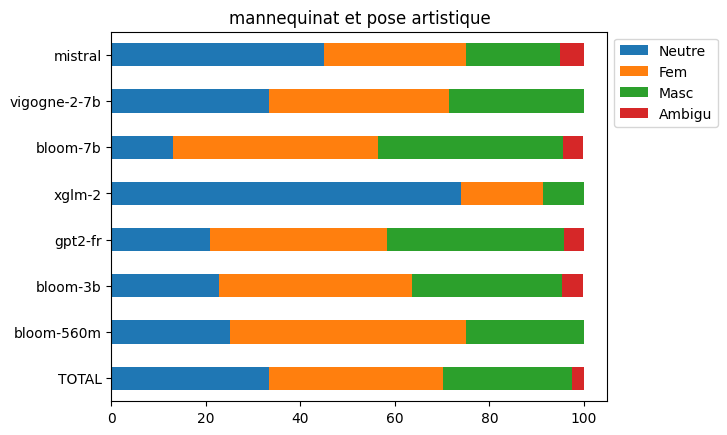

In [19]:
"""Ordre par topic, puis par modèle"""
#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutre","Fem", "Masc","Ambigu"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutre":float(d["Neutre"][:-1]), "Fem":float(d["Fem"][:-1]),
                 "Masc":float(d["Masc"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]
    new_dic = {}
    for genre in ["Neutre", "Fem", "Masc", "Ambigu"]:
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()

## Stylometry (text stats)

Some statistics and graphs on data: average number of words, characters, single words, etc.
(function adapted from code found online: https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [ ]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masc"
    cat_f="Fem"
    cat_n="Neutre"
    cat_a = "Ambigu"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["output"].apply(lambda x: len(str(x).split()))
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['output'].apply(lambda x: len(str(x)))

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['output'].apply(lambda x: len(set(str(x).split())))
    
    res_word= {"Masc": dataset[dataset[label]==cat_m]['word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masc": dataset[dataset[label]==cat_m]['char_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masc": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char


ZeroDivisionError: division by zero